# 1. Frame the Problem and Look at the Big Picture

Artificial intelligence models that will be produced based on [real hotel reservation data](https://www.sciencedirect.com/science/article/pii/S2352340918315191) will make it easier for hotel management to achieve their goals, increase customer satisfaction and profit margin.<br>**These models are:**

##### **-- Customer Segmentation --**

**The objective** is to identify distinct customer segments based on their booking behavior, preferences, and characteristics. This segmentation will allow the business to tailor marketing strategies, optimize pricing, and improve customer satisfaction by addressing the needs of different groups more effectively.

**How will be used?**<br>
The solution will be used to:
- Develop personalized marketing campaigns for different customer segments.
- Adjust pricing strategies for high-value customers or price-sensitive groups.
- Improve service offerings by catering to specific customer preferences.
- Enhance overall customer experience and retention.

**What are the current solutions:**<br>
Currently, customer segmentation might be performed using basic filters or heuristics based on demographics or booking data. These approaches lack the depth of insights provided by data-driven clustering models.

**System Design:**
1. This is an **unsupervised learning** problem since there are no predefined labels or target outcomes. It will be solved offline, using historical data for clustering customers into segments.
2. Model `K-Means Clustering`
3. Performance should be measured using clustering evaluation metrics such as:
    - **Silhouette Score:** Measures how well-separated the clusters are.
    - **Inertia (Within-Cluster Sum of Squares):** Measures compactness within clusters.
    - **Business validation:** How actionable and interpretable the clusters are for the business.

**Minimum performance needed to reach the business objective:**<br>
The clusters should be:
- Distinct and interpretable.
- Actionable, enabling marketing or operational strategies to be developed.
- Validated through business insights or pilot campaigns.

**Comparable problems**
- Market segmentation in retail or e-commerce.
- Customer behavior analysis in travel and tourism. Experience with clustering techniques such as K-Means, DBSCAN, or hierarchical clustering can be reused. Tools like Python's Scikit-learn, Pandas, and visualization libraries (e.g., Seaborn, Matplotlib) will be helpful.

##### **-- Booking Cancellation Prediction --**

**The objective** is to predict whether a customer will cancel a booking based on their booking behavior, preferences, and historical data. This will enable the hotel to reduce revenue loss, optimize resource allocation, and design effective customer retention strategies.

**How will be used?**<br>
The solution will be used to:
- **Predict cancellations** in advance and prepare contingency plans.
- **Improve revenue management** by forecasting demand accurately and minimizing overbooking risks.
- **Tailor communication** with customers likely to cancel (e.g., send reminders or offer incentives to confirm their stay).
- **Optimize staff scheduling and inventory allocation** to avoid wasted resources.

**What are the current solutions:**<br>
Currently, hotels may rely on manual analysis or basic rules of thumb (e.g., longer lead times or larger group bookings are more likely to cancel). These methods lack accuracy and scalability.

**System Design:**
1. This is a **supervised learning** problem since we have labeled data (`IsCanceled`) to train the model. The problem will be solved offline using historical booking data, with periodic updates to the model as new data becomes available.
2. Models to test; `Logistic Regression`, `Random Forest`, `Gradient Boosting (XGBoost, LightGBM)`, `Deep Learning (Neural Networks)` and similar Models
3. Performance should be measured using classification metrics:
    - **Accuracy:** Percentage of correct predictions.
    - **Precision and Recall:** Especially for the "cancellation" class, since false positives and false negatives have different implications.
    - **F1 Score:** Balances precision and recall.
    - **ROC-AUC Score:** Evaluates the model's overall classification ability.

**Minimum performance needed to reach the business objective:**<br>
- **Recall:** At least 80% for identifying potential cancellations.
- **Precision:** A reasonably high value to minimize unnecessary actions (e.g., overreacting to false positives).
- **Overall Accuracy:** 70%-80% or higher.

**Comparable problems**
- Churn prediction in telecom or e-commerce.
- Fraud detection in banking. Experience with binary classification algorithms such as Logistic Regression, Random Forest, and Gradient Boosting can be reused. Tools like Python’s Scikit-learn, XGBoost, and TensorFlow are applicable.

##### **-- Dynamic Pricing --**

**The objective** is to dynamically adjust room prices based on demand, customer preferences, and market trends to maximize revenue while maintaining competitive pricing. This approach will help the hotel optimize occupancy rates and revenue per available room (RevPAR).

**How will be used?**<br>
The solution will be integrated into the hotel’s pricing strategy and used to:
- Automatically recommend optimal room rates based on real-time data.
- Respond to changes in demand, seasonality, and market conditions.
- Provide personalized pricing for different customer segments.
- Increase overall profitability by minimizing revenue lost to underpricing or missed opportunities due to overpricing.

**What are the current solutions:**<br>
Current solutions may include:
- Fixed seasonal pricing, which lacks flexibility.
- Manual adjustments based on intuition or historical data, which are time-consuming and less accurate.
- Third-party revenue management systems, which may not be customized for the hotel’s unique needs.

**System Design:**
1. This is a supervised learning problem, predicting optimal prices based on historical data.
2. Models to test; Linear Regression, Random Forest Regressor, Gradient Boosting (XGBoost, LightGBM), Reinforcement Learning, ARIMA/SARIMA 
3. Performance should be measured using:
    - **Revenue Metrics:** Total revenue, RevPAR (Revenue per Available Room).
    - **Occupancy Rate:** Percentage of rooms sold.
    - **Model Accuracy:** Predictive accuracy for optimal price suggestions.
    - **Comparison with Baseline:** Revenue improvement compared to current static pricing strategies.
    - **Mean Absolute Error (MAE):**The average of the difference between actual and forecast prices.
    - **Mean Squared Error (MSE):** It is more sensitive to larger errors.

**Minimum performance needed to reach the business objective:**
- A measurable increase in RevPAR compared to the existing pricing strategy (e.g., a 10%-20% improvement).
- Maintaining or increasing the occupancy rate without significant customer dissatisfaction.

**Comparable problems**
- Dynamic pricing in airlines and e-commerce.
- Yield management in car rentals and event ticketing. Tools and techniques used for demand forecasting, time series analysis, and reinforcement learning can be adapted for this problem.

**Libraries to USE in this Project:**

In [1291]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# 2. Load and Observe the Data

**Load Data:**

In [1292]:
# load data
h1_df = pd.read_csv('../data/H1.csv')    # Resort Hotel
h2_df = pd.read_csv('../data/H2.csv')    # City Hotel

**Overview:**

In [1293]:
h1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   40060 non-null  int64  
 1   LeadTime                     40060 non-null  int64  
 2   ArrivalDateYear              40060 non-null  int64  
 3   ArrivalDateMonth             40060 non-null  object 
 4   ArrivalDateWeekNumber        40060 non-null  int64  
 5   ArrivalDateDayOfMonth        40060 non-null  int64  
 6   StaysInWeekendNights         40060 non-null  int64  
 7   StaysInWeekNights            40060 non-null  int64  
 8   Adults                       40060 non-null  int64  
 9   Children                     40060 non-null  int64  
 10  Babies                       40060 non-null  int64  
 11  Meal                         40060 non-null  object 
 12  Country                      39596 non-null  object 
 13  MarketSegment   

In [1294]:
h2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

We have two datasets and both datasets share the same structure with 31 variables
1. ***h1_df*** (*Resort Hotel* -Portugal/Algarve-): 40,060 observations
2. ***h2_df*** (*City Hotel* -Portugal/Lisbon-): 79,330 observations

* Each observation represents a hotel booking. 
* Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

In [1295]:
h1_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [1296]:
h2_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


**Feature Summary:**

|         | **Feature (Variable)** | **Type** | **Example** | **Description** |
| :-----: | ---------------------- | :---------: | :--------: | --------------- |
| **1.**  | `IsCanceled` | Categorical | **0** | Value indicating if the booking was canceled (1) or not (0) |
| **2.**  | `LeadTime` | Integer | **21** | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| **3.**  | `ArrivalDateYear` | Integer | **2016** | Year of arrival date |
| **4.**  | `ArrivalDateMonth` | Categorical | **September** | Month of arrival date with 12 categories: “January” to “December” |
| **5.**  | `ArrivalDateWeekNumber` | Integer | **37** | Week number of the arrival date |
| **6.**  | `ArrivalDateDayOfMonth` | Integer | **9** | Day of the month of the arrival date |
| **7.**  | `StaysInWeekendNights` | Integer | **0** | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| **8.**  | `StaysInWeekNights` | Integer | **2** | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| **9.**  | `Adults` | Integer | **2** | Number of adults |
| **10.** | `Children` | Integer | **0.0** | Number of children |
| **11.** | `Babies`| Integer | **0** | Number of babies |
| **12.** | `Meal` | Categorical | **HB** | Type of meal booked. Categories are presented in standard hospitality meal packages:<br> <ul> <li>Undefined/SC – no meal package</li> <li>BB – Bed & Breakfast</li> <li>HB – Half board (breakfast and one other meal – usually dinner)</li> <li>FB – Full board (breakfast, lunch and dinner)</li> </ul> |
| **13.** | `Country` | Categorical | **ESP** | Country of origin.<br>Categories are represented in the ISO 3155–3:2013 format [6]|
| **14.** | `MarketSegment` | Categorical | **Online TA** | Market segment designation. In categories, <br> <ul> <li>“TA” means “Travel Agents”</li> <li>“TO” means “Tour Operators”</li> |
| **15.** | `DistributionChannel` | Categorical | **TA/TO** | Booking distribution channel. <br> <ul> <li>“TA” means “Travel Agents”</li> <li>“TO” means “Tour Operators”</li> |
| **16.** | `IsRepeatedGuest` | Categorical | **0** | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| **17.** | `PreviousCancellations` | Integer | **0** | Number of previous bookings that were cancelled by the customer prior to the current booking |
| **18.** | `PreviousBookingsNotCanceled` | Integer | **0** | Number of previous bookings not cancelled by the customer prior to the current booking |
| **19.** | `ReservedRoomType` | Categorical | **A** | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
| **20.** | `AssignedRoomType` | Categorical | **A** | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
| **21.** | `BookingChanges` | Integer | **1** | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| **22.** | `DepositType` | Categorical | **No Deposit** | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br> <ul> <li>No Deposit – no deposit was made</li> <li>Non Refund – a deposit was made in the value of the total stay cost</li> <li>Refundable – a deposit was made with a value under the total cost of stay.</li> |
| **23.** | `Agent` | Categorical | **9** | ID of the travel agency that made the booking |
| **24.** | `Company` | Categorical | **NULL** | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
| **25.** | `DaysInWaitingList` | Integer | **0** | Number of days the booking was in the waiting list before it was confirmed to the customer |
| **26.** | `CustomerType` | Categorical | **Transient** | Type of booking, assuming one of four categories: <br> <ul> <li>Contract - when the booking has an allotment or other type of contract associated to it</li> <li>Group – when the booking is associated to a group</li> <li>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking</li>  <li>Transient-party – when the booking is transient, but is associated to at least other transient booking</li> </ul> |
| **27.** | `ADR` | Numeric | **183.15** | Average Daily Rate |
| **28.** | `RequiredCarParkingSpaces` | Integer | **0** | Number of car parking spaces required by the customer |
| **29.** | `TotalOfSpecialRequests` | Integer | **1** | Number of special requests made by the customer (e.g. twin bed or high floor) |
| **30.** | `ReservationStatus` | Categorical | **Check-Out** | Reservation last status, assuming one of three categories: <br> <ul> <li>Canceled – booking was canceled by the customer</li> <li>Check-Out – customer has checked in but already departed</li> <li>No-Show – customer did not check-in and did inform the hotel of the reason why</li> </ul> |
| **31.** | `ReservationStatusDate` | Date | **2016-09-11** | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |

**Note:**
Although there may be similar and different problems to be investigated between the *resort hotel* and the *city hotel*, due to the abundance of *city hotel* data in terms of machine learning efficiency, I will perform observations and modeling using this data set. Then, I will apply the optimal solutions I obtained to both data sets.

**Summary Statistics:**

In [1297]:
# Categorical and Numerical Columns 
h2_df_cat = h2_df.select_dtypes(include=['object']).columns.tolist()
h2_df_num = h2_df.select_dtypes(exclude=['object']).columns.tolist()

In [1298]:
# Statistical Summary of Categorical Variables
h2_df[h2_df_cat].describe().T.sort_values(by='unique')

,count,unique,top,freq
DepositType,79330,3,No Deposit,66442
ReservationStatus,79330,3,Check-Out,46228
Meal,79330,4,BB,62305
CustomerType,79330,4,Transient,59404
DistributionChannel,79330,5,TA/TO,68945
MarketSegment,79330,8,Online TA,38748
ReservedRoomType,79330,8,A,62595
AssignedRoomType,79330,9,A,57007
ArrivalDateMonth,79330,12,August,8983
Country,79306,166,PRT,30960


In [1299]:
# Statistical Summary of Numerical Variables
h2_df[h2_df_num].describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateWeekNumber,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0


**Distribution of DATA**

Low cardinality columns: ['IsCanceled', 'ArrivalDateYear', 'ArrivalDateMonth', 'StaysInWeekendNights', 'Adults', 'Children', 'Babies', 'Meal', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'CustomerType', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus']


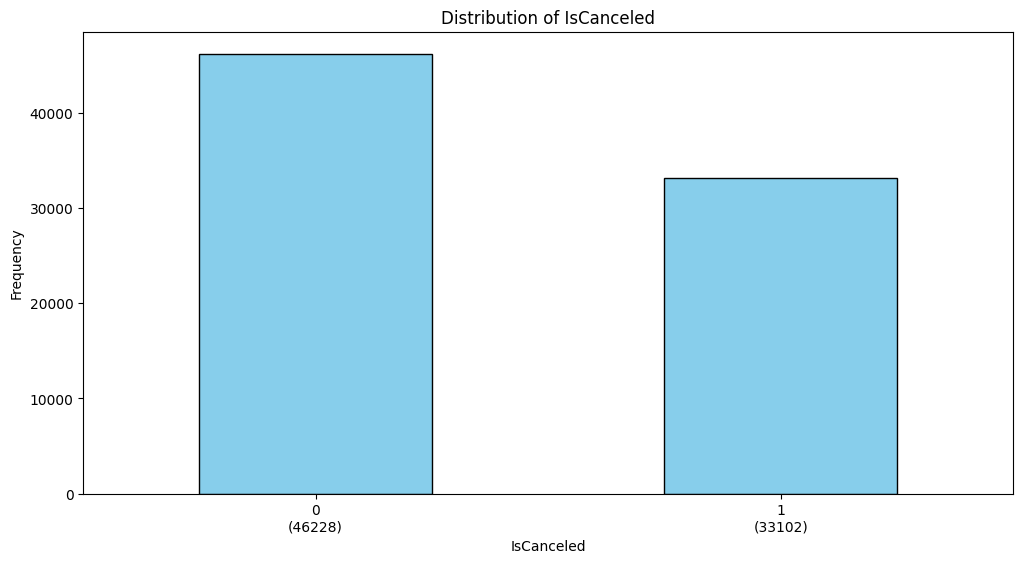

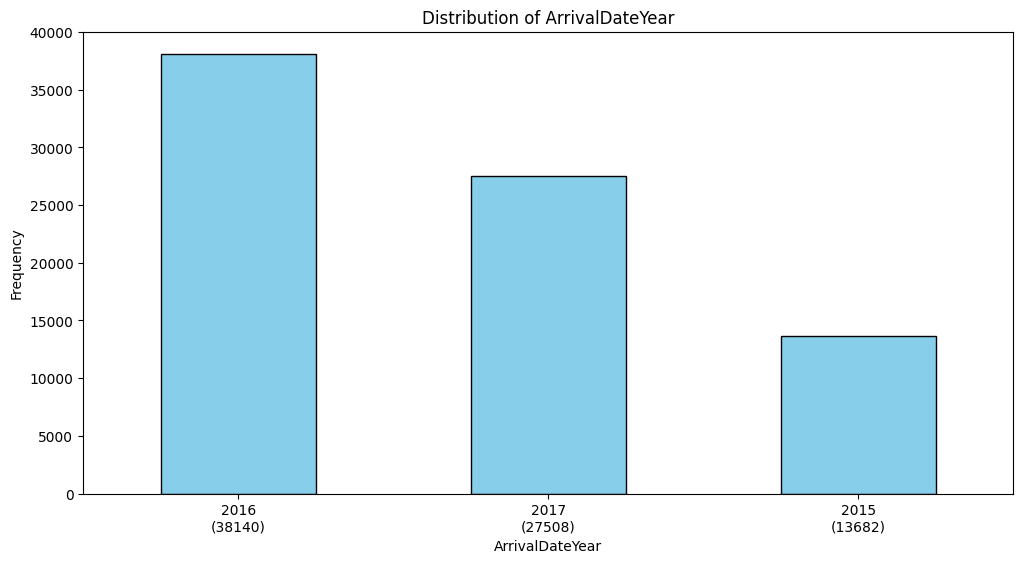

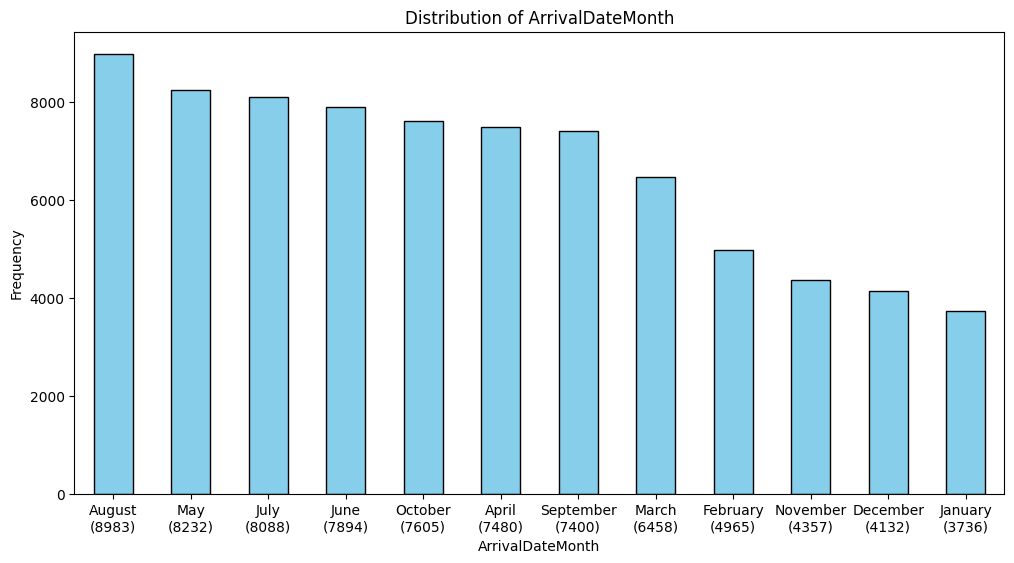

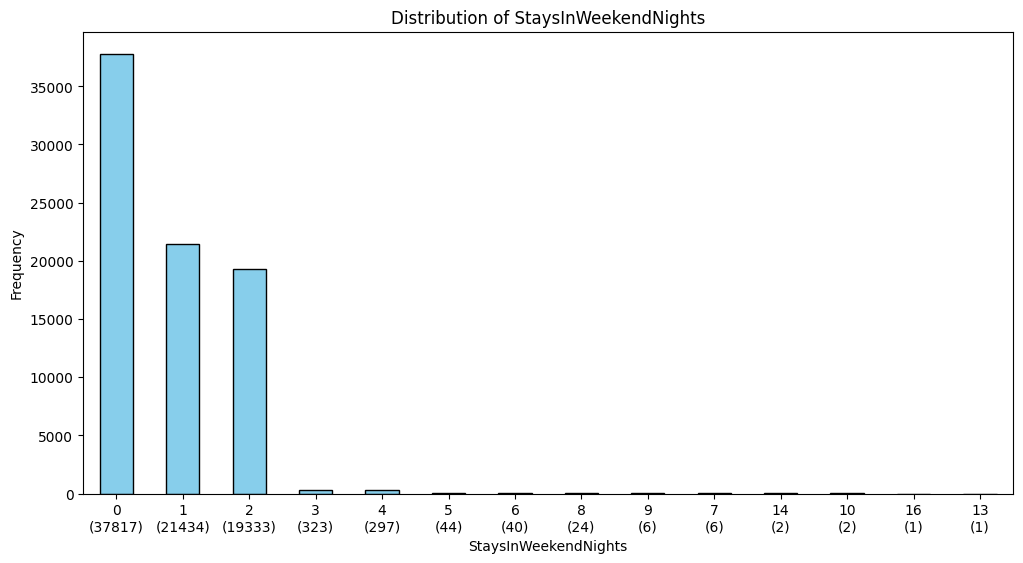

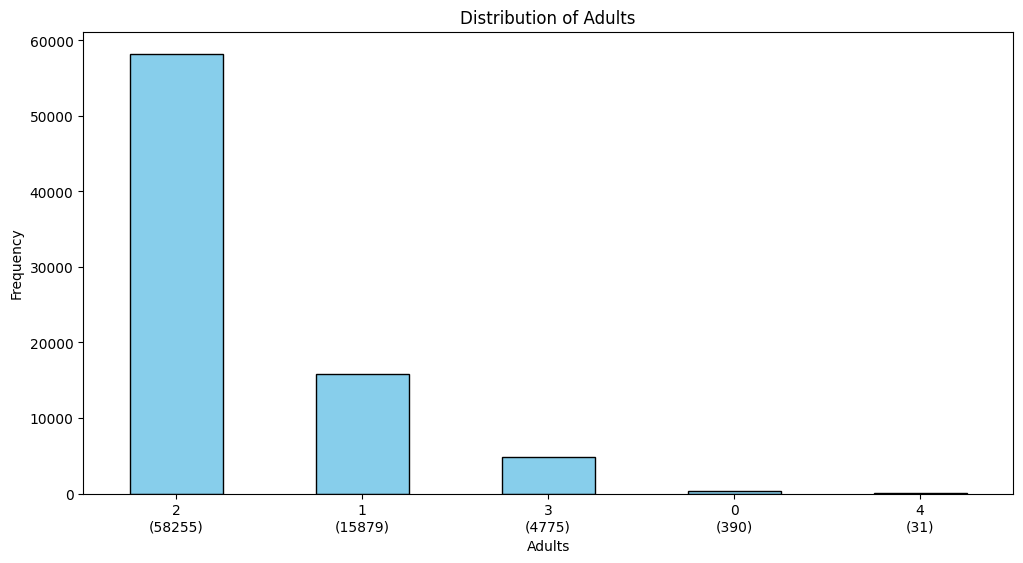

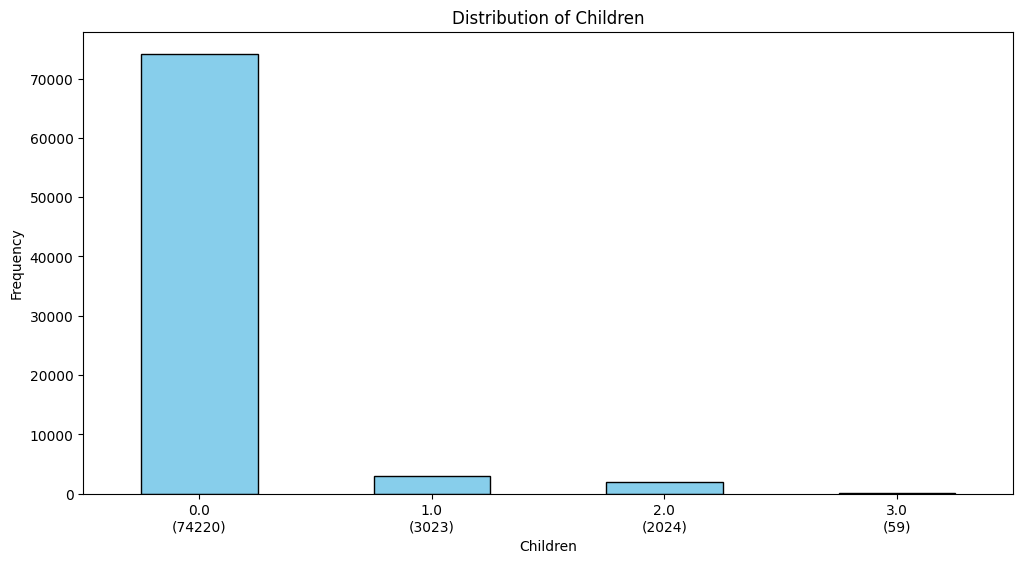

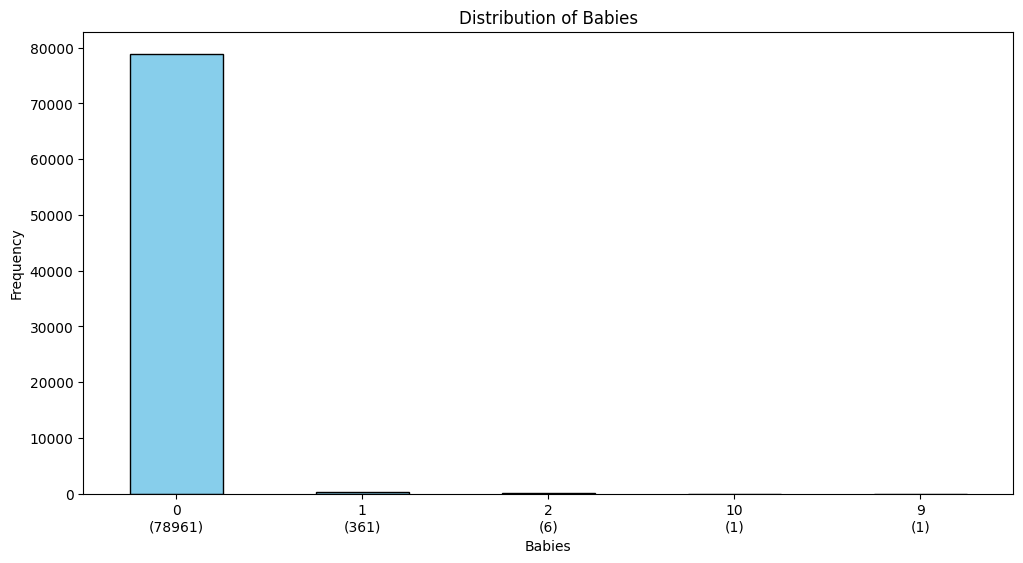

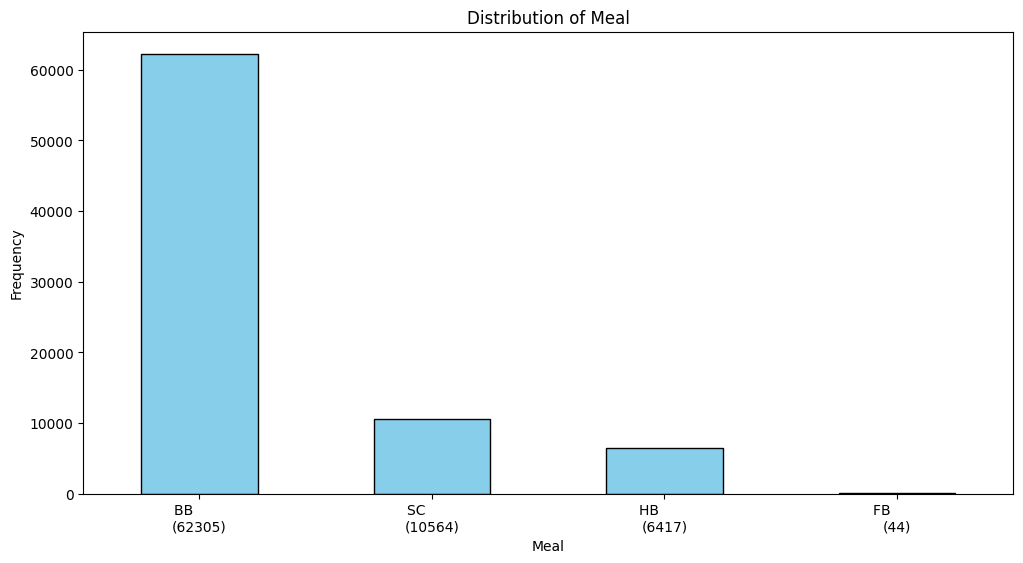

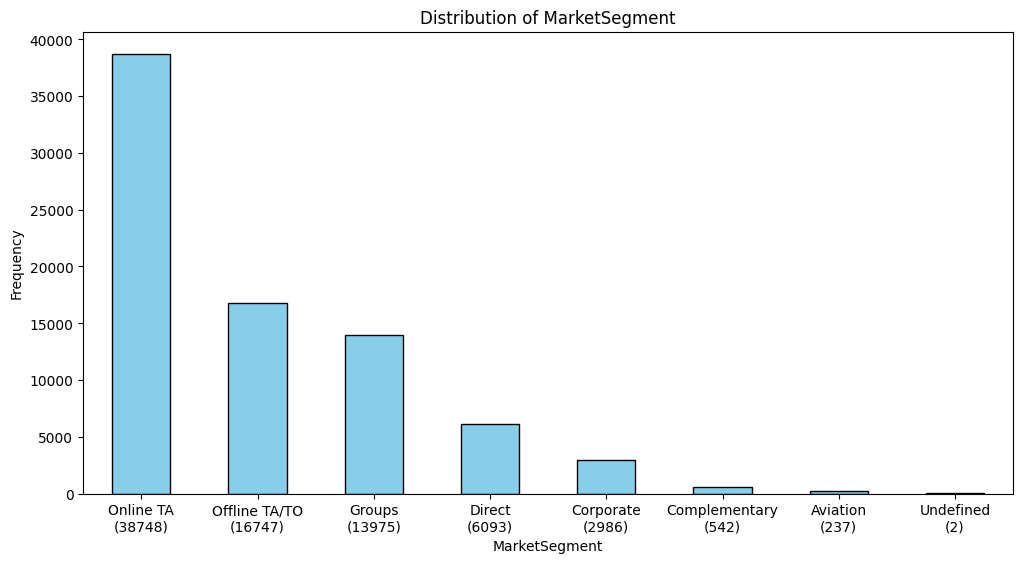

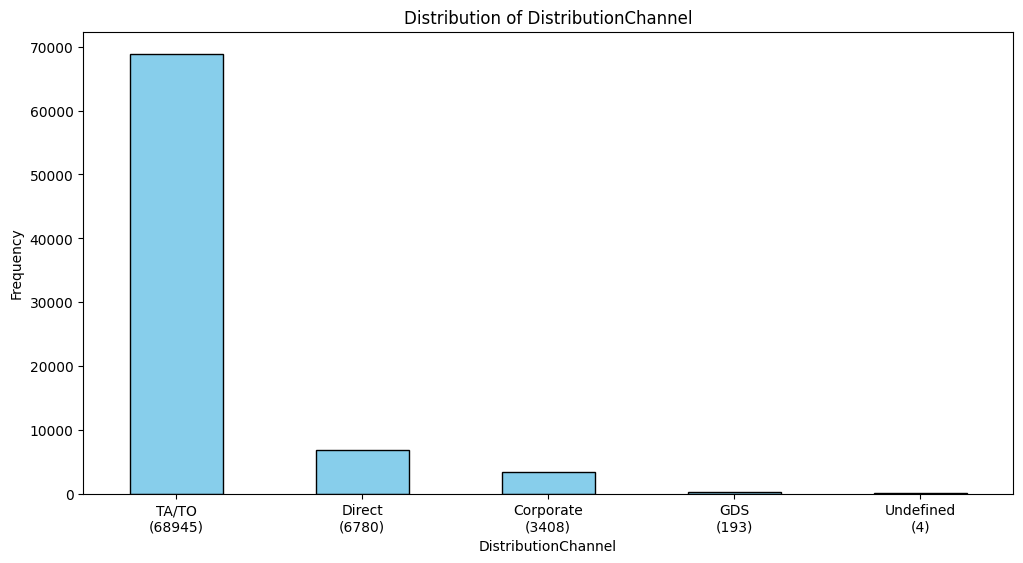

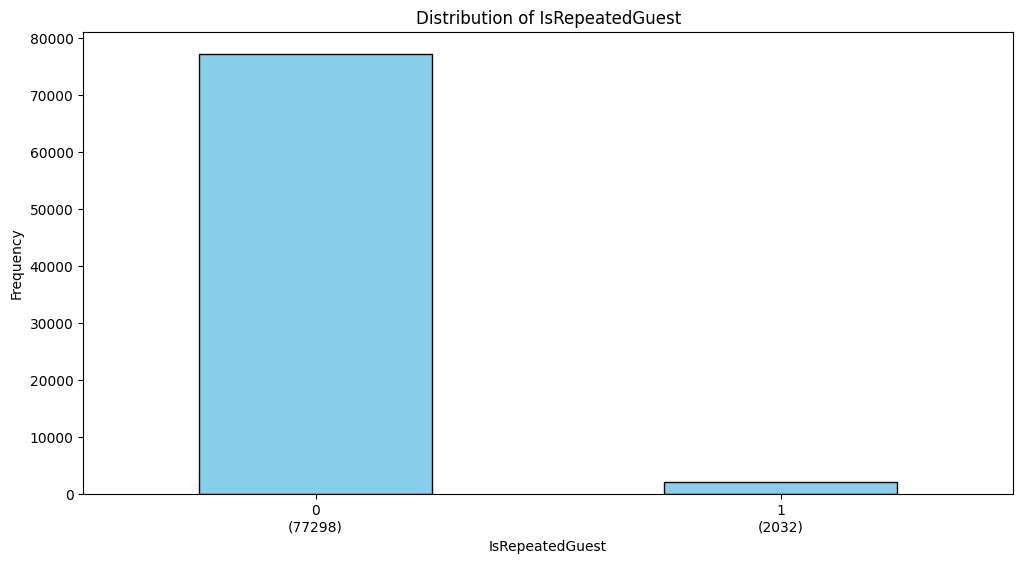

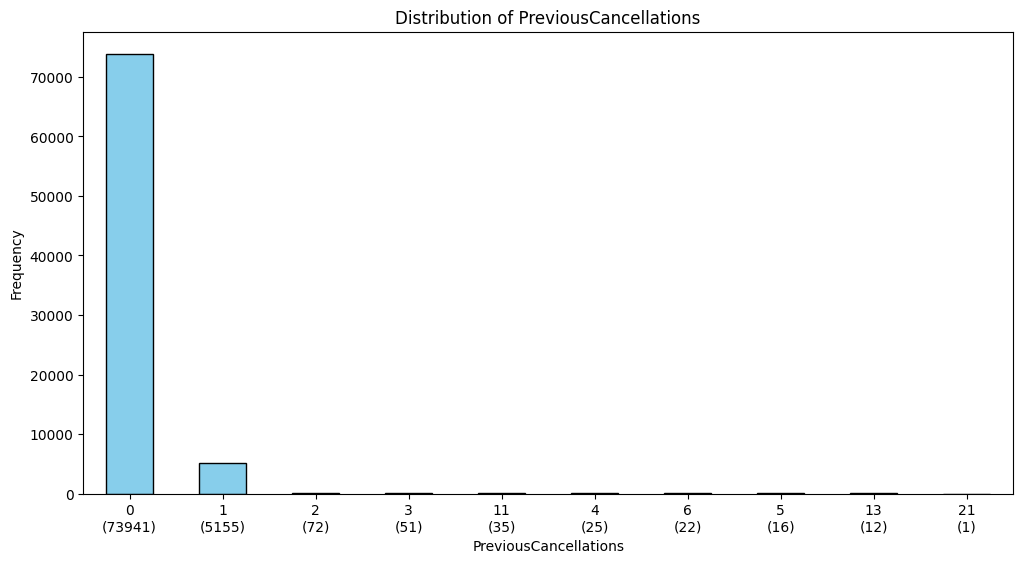

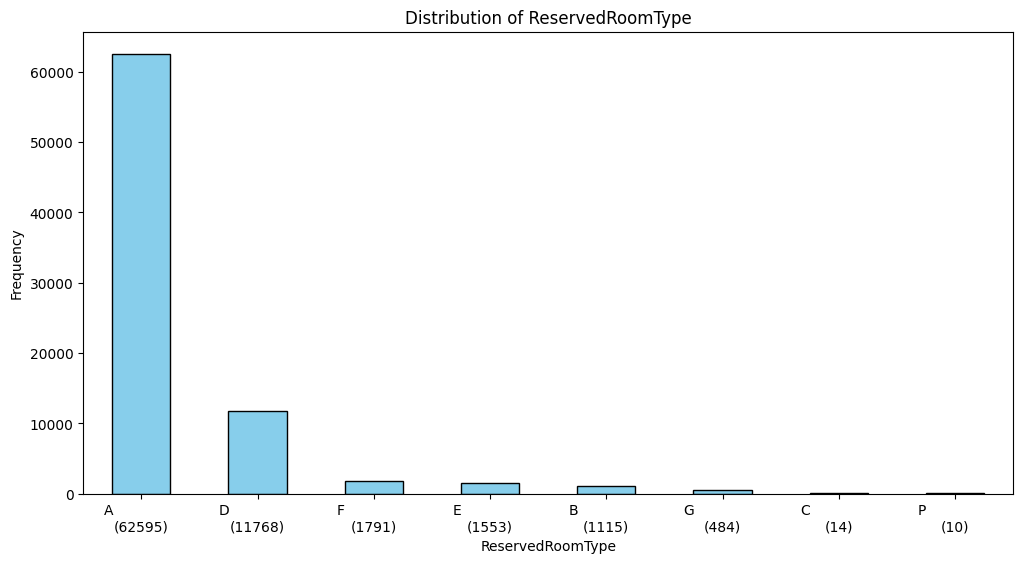

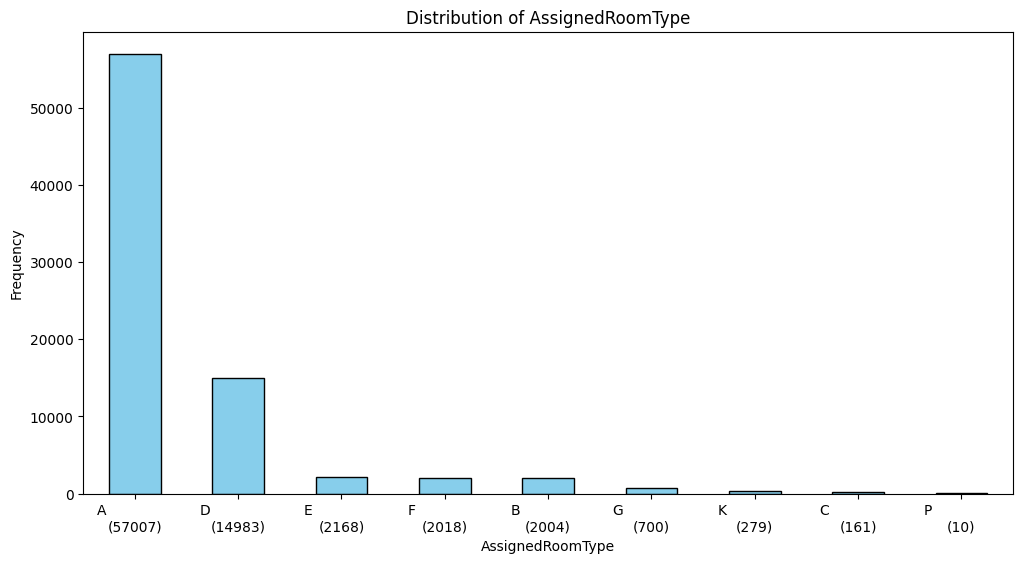

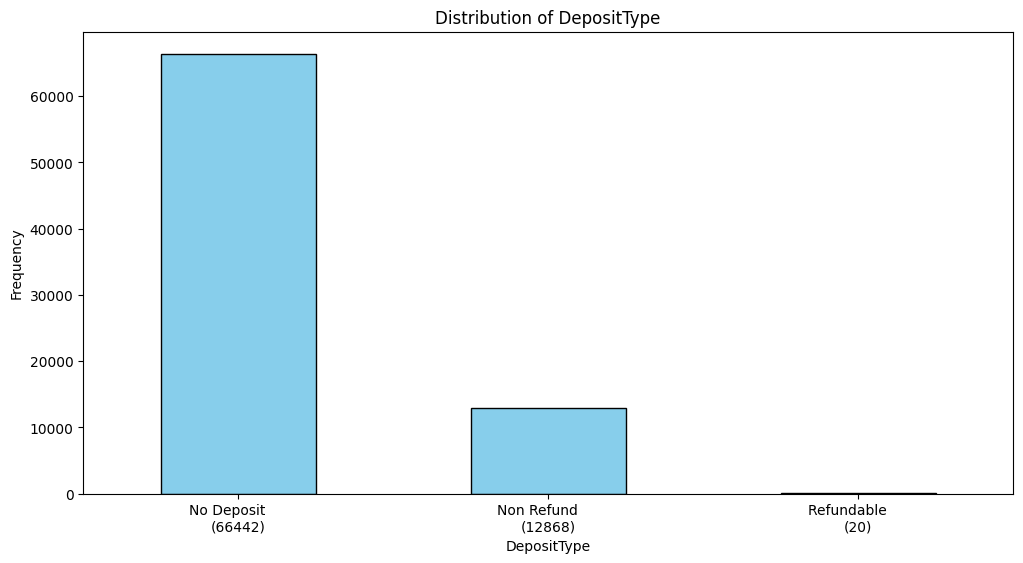

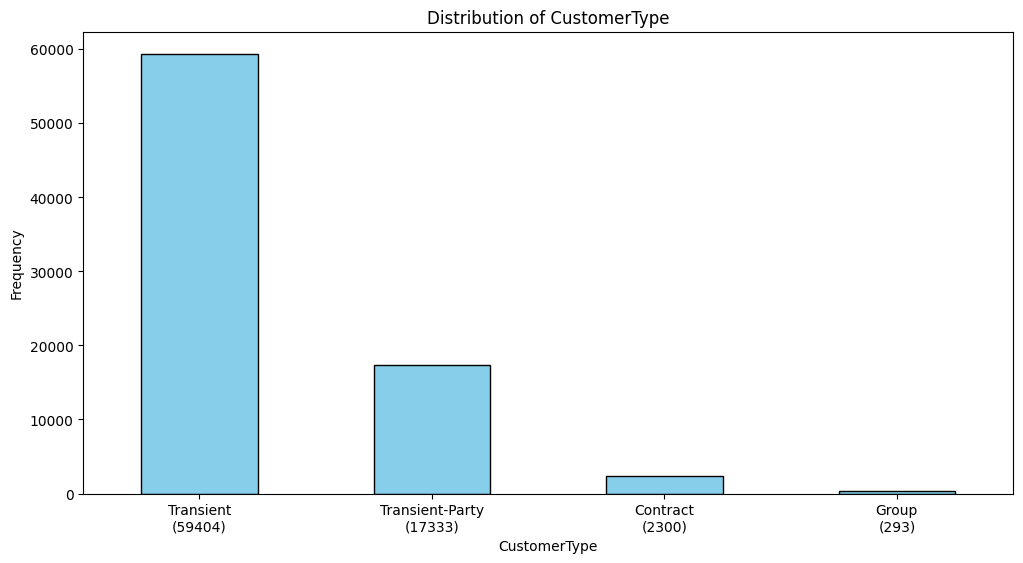

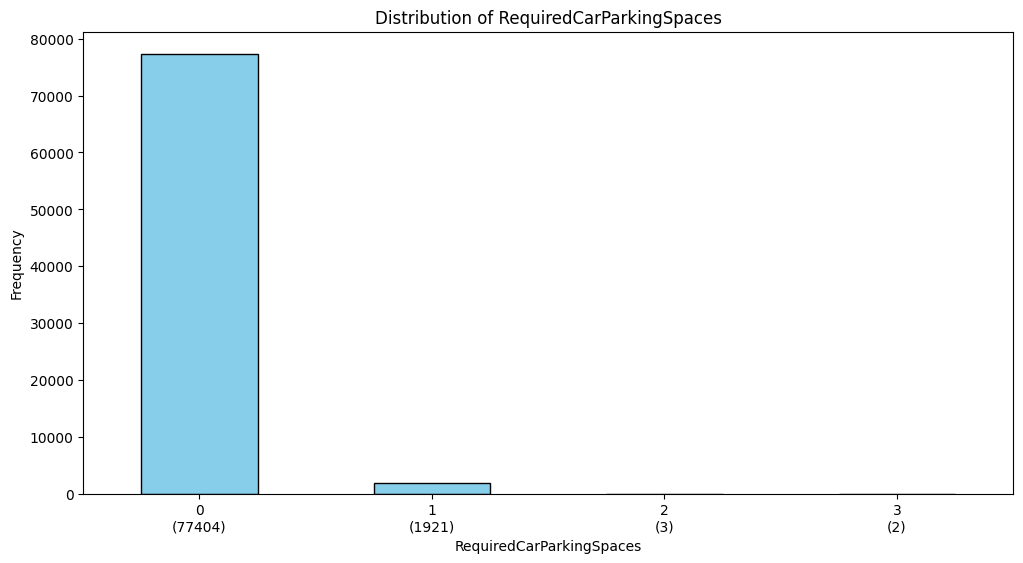

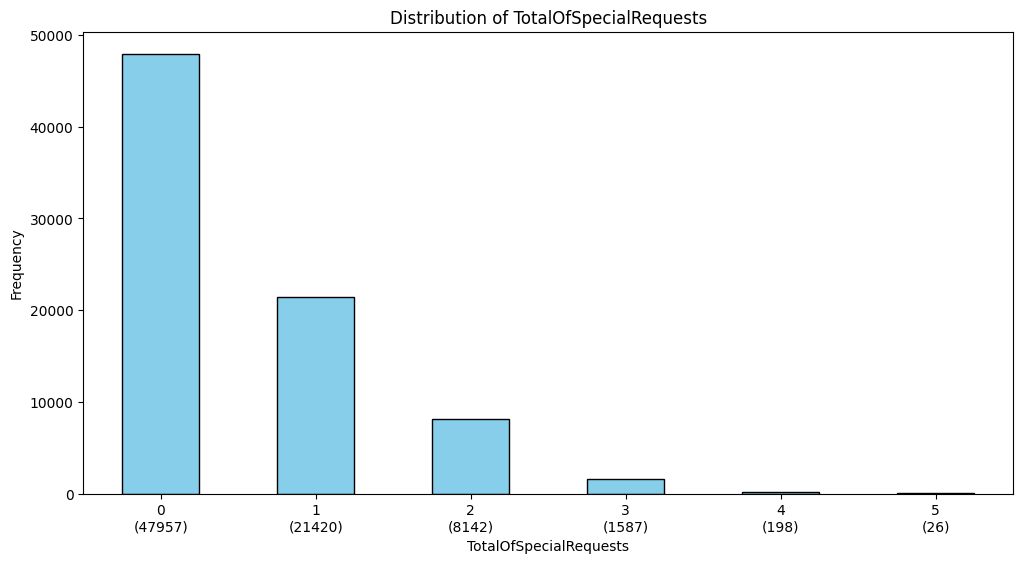

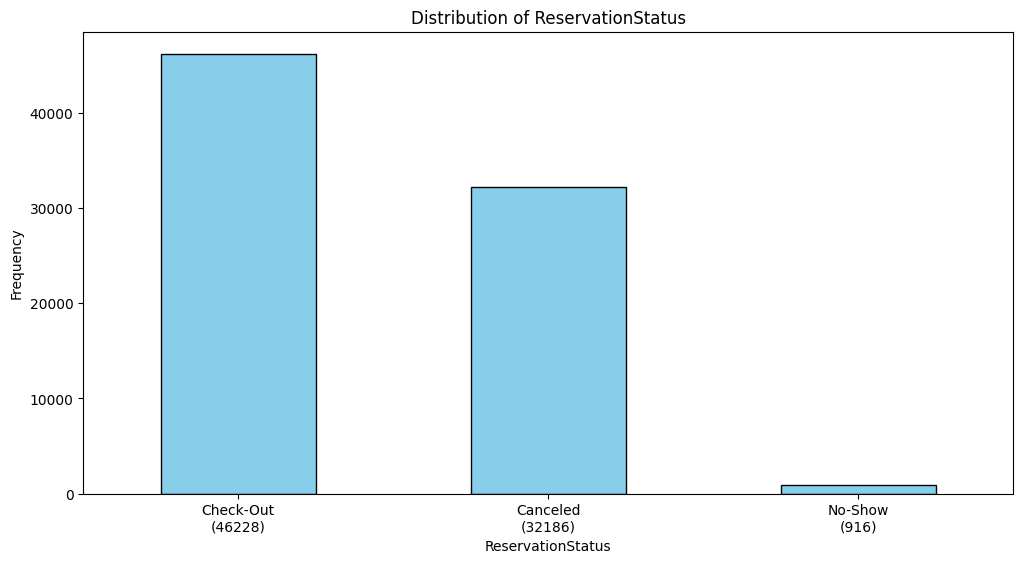

In [1300]:
def low_cardinality_columns(df, threshold=15):
    """Returns the names of columns with low cardinality"""
    low_card_cols = [col for col in df.columns if df[col].nunique() < threshold]
    return low_card_cols


def plot_low_cardinality_columns(df, col, size=[12, 6], xlabel_angle=0, title=""):
    """use this for plotting the count of categorical features"""
    value_counts = df[col].value_counts()
    plot = value_counts.plot(kind="bar", figsize=size, color='skyblue', edgecolor='black')
    plot.set_title(title)
    plot.set_xlabel(col)
    plot.set_ylabel("Frequency")
    plot.set_xticklabels([f'{label}\n({count})' for label, count in zip(value_counts.index, value_counts.values)], rotation=xlabel_angle)
    plt.show()


# Low Cardinality columns
low_card_cols = low_cardinality_columns(h2_df)
print("Low cardinality columns:", low_card_cols)

# Plot Low Cardinality columns
for col in low_card_cols:
    plot_low_cardinality_columns(h2_df, col, title=f"Distribution of {col}")

High cardinality columns: ['LeadTime', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekNights', 'Country', 'PreviousBookingsNotCanceled', 'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList', 'ADR', 'ReservationStatusDate']


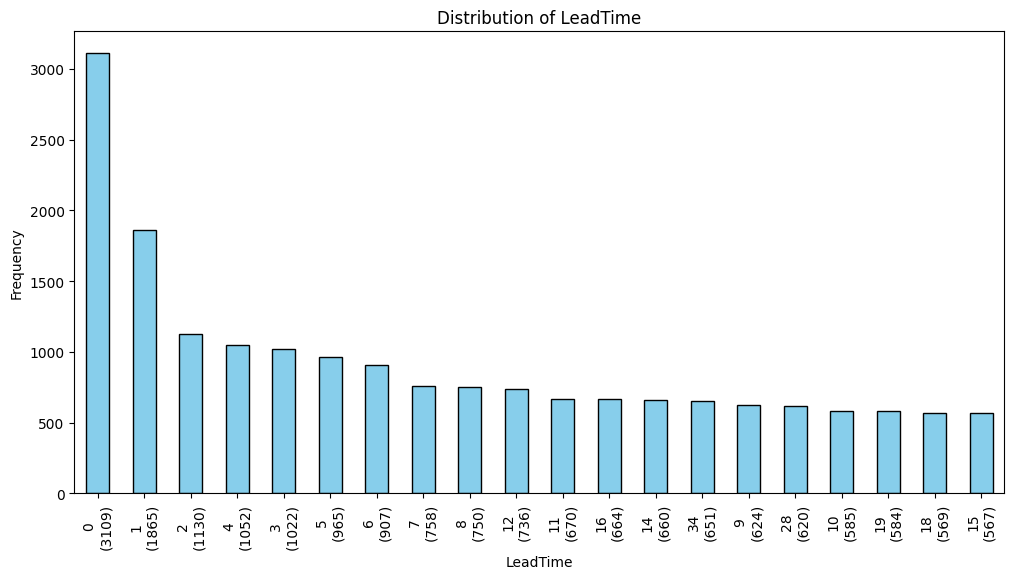

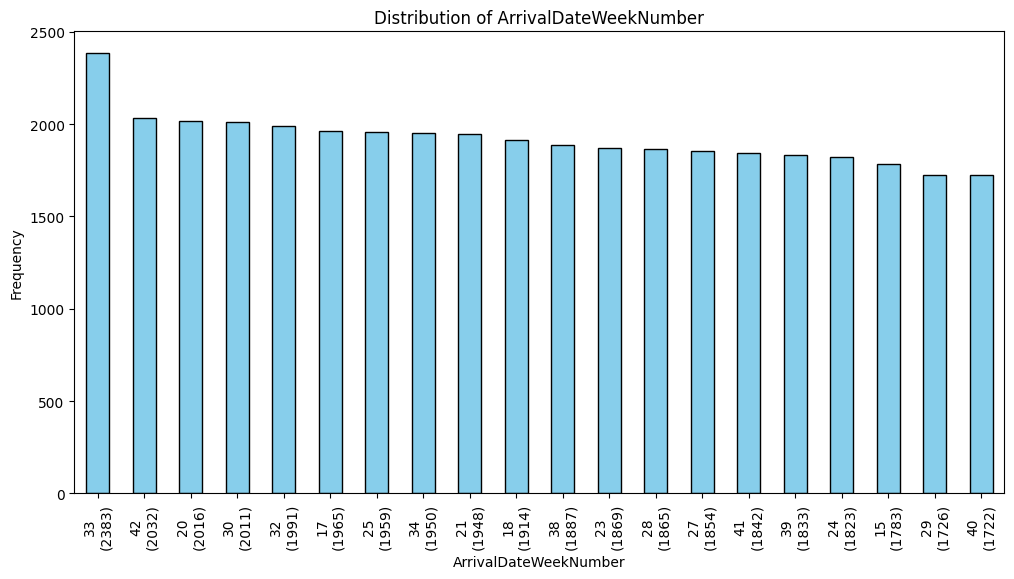

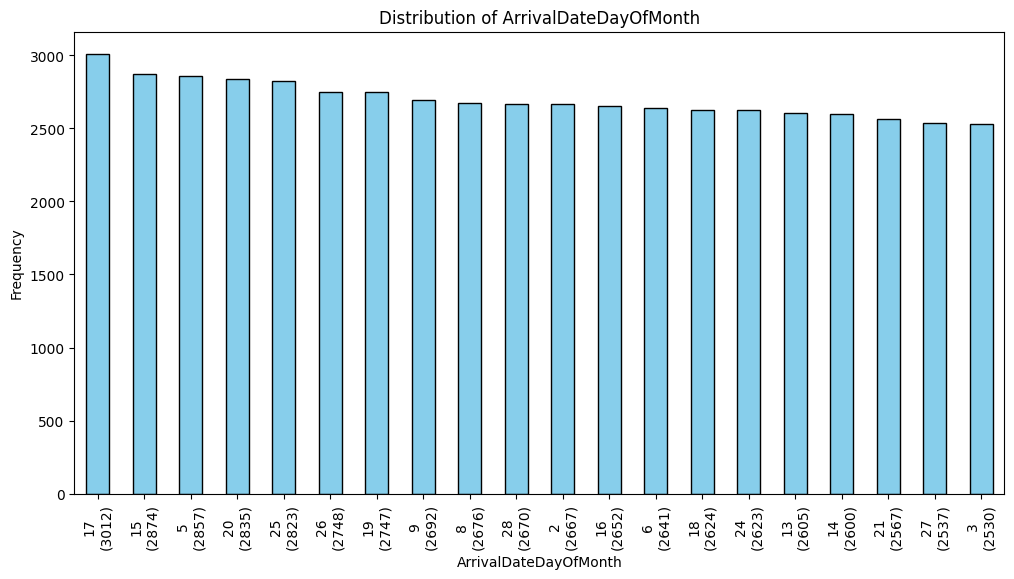

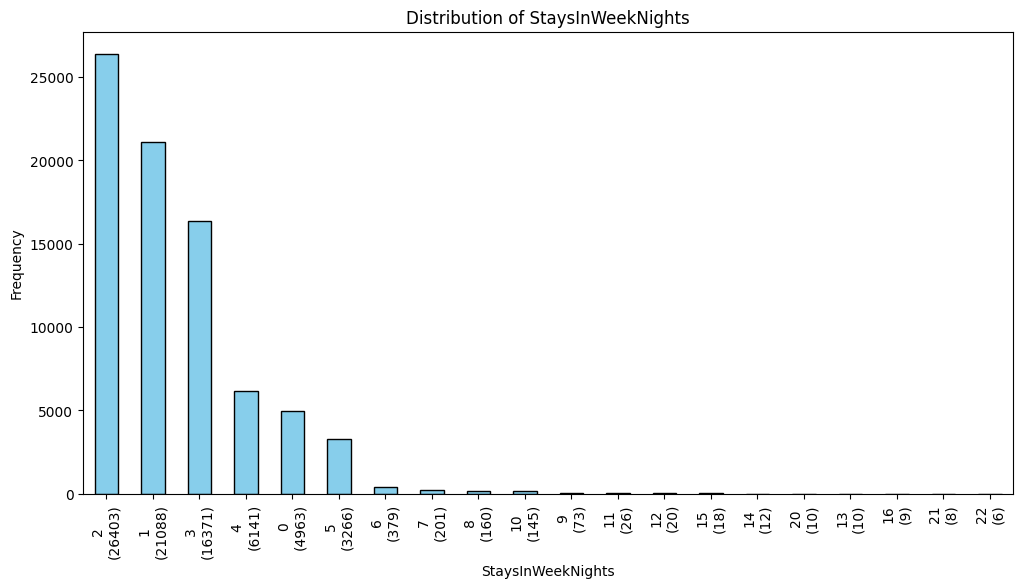

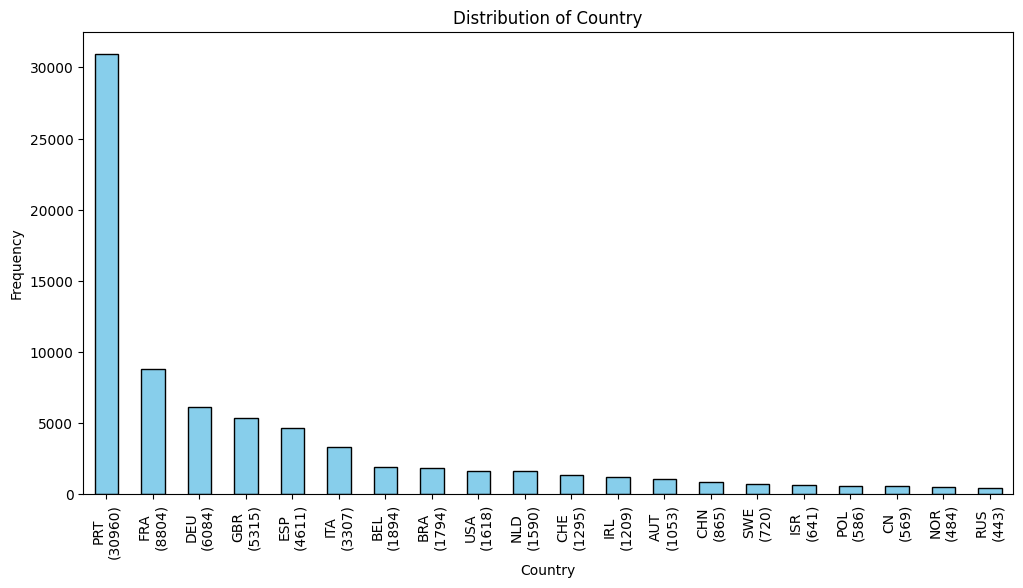

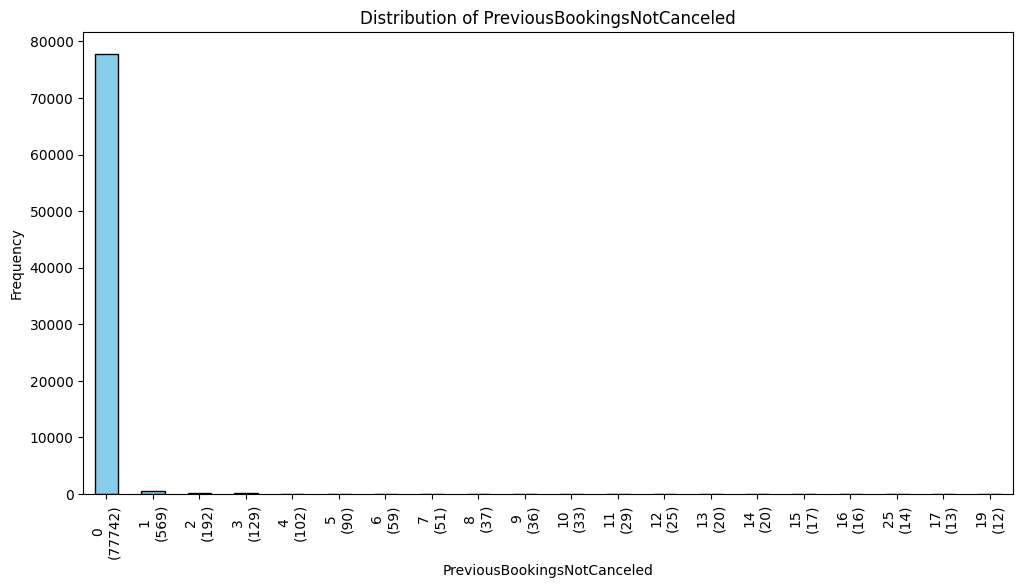

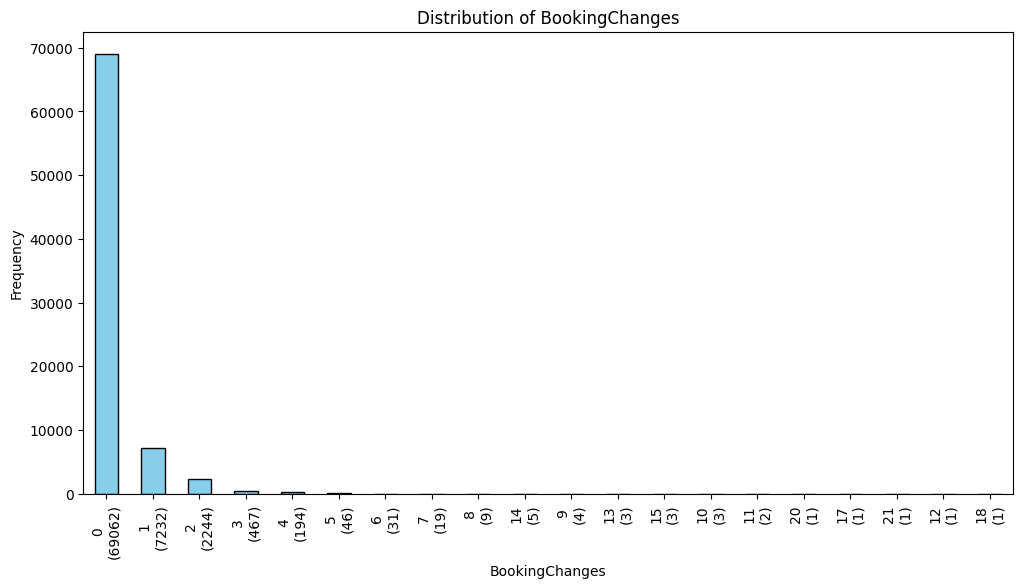

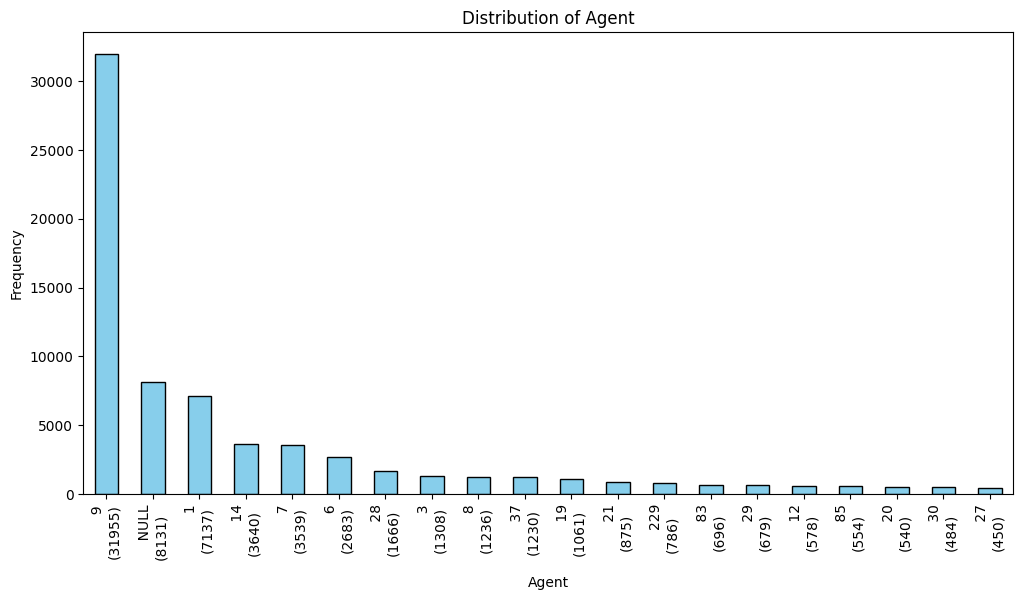

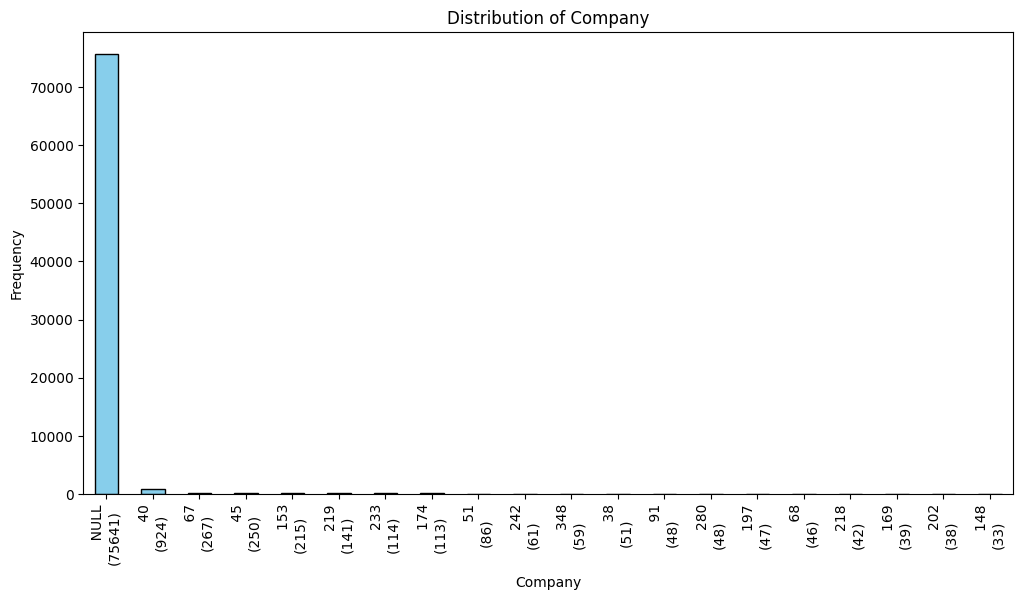

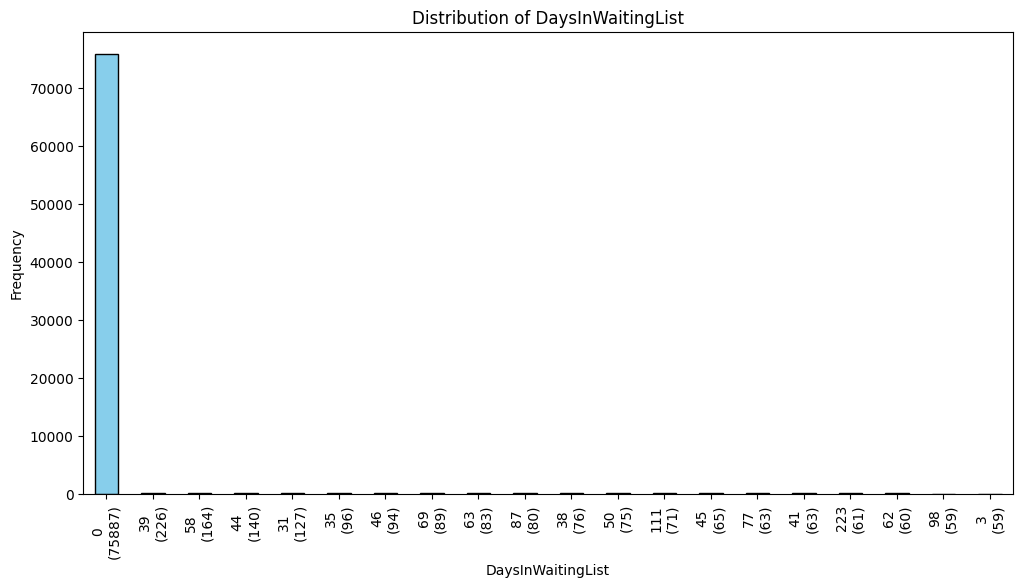

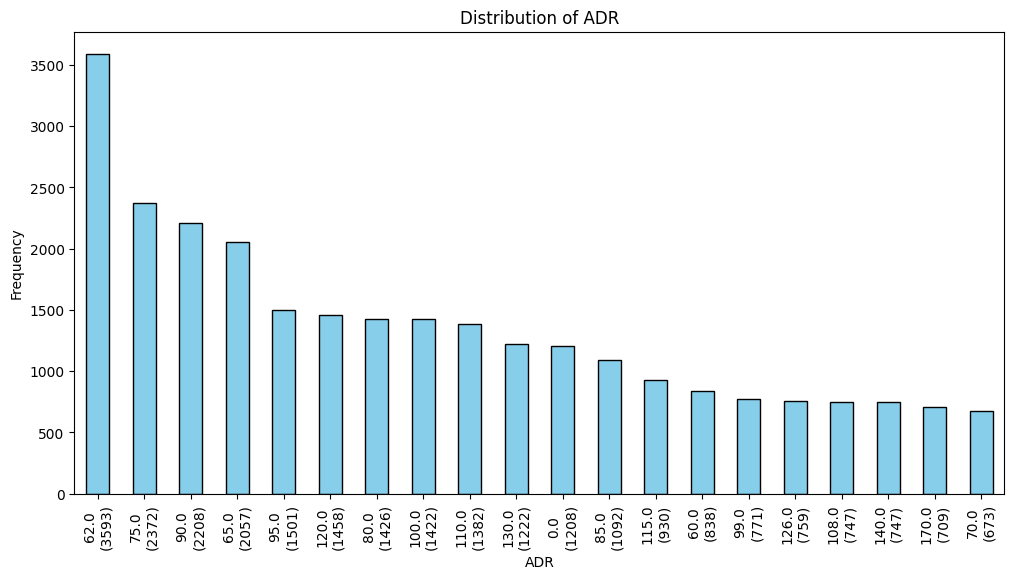

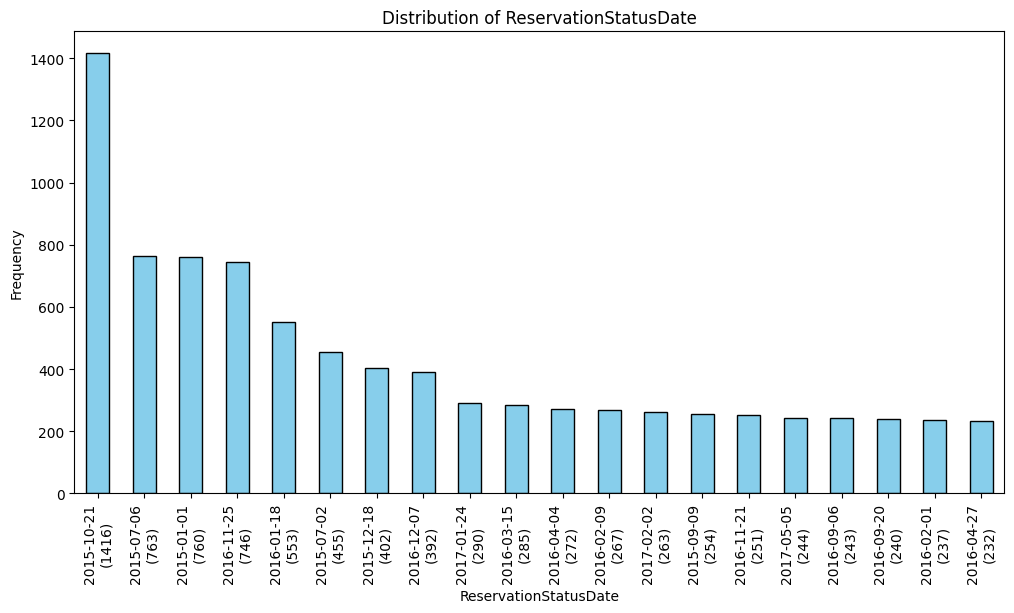

In [1301]:
def high_cardinality_columns(df, threshold=15):
    """Returns the names of columns with high cardinality"""
    high_card_cols = [col for col in df.columns if df[col].nunique() > threshold]
    return high_card_cols


def plot_high_cardinality_columns(df, col, size=[12, 6], xlabel_angle=90, title=""):
    """use this for plotting the count of high cardinality features"""
    value_counts = (df[col].value_counts().head(20))  # Display top 20 categories for better visualization
    plot = value_counts.plot(kind="bar", figsize=size, color="skyblue", edgecolor="black")
    plot.set_title(title)
    plot.set_xlabel(col)
    plot.set_ylabel("Frequency")
    plot.set_xticklabels(
        [
            f"{label}\n({count})"
            for label, count in zip(value_counts.index, value_counts.values)
        ],
        rotation=xlabel_angle,
    )
    plt.show()


# High Cardinality columns
high_card_cols = high_cardinality_columns(h2_df)
print("High cardinality columns:", high_card_cols)


# Plot High Cardinality columns, shows top 20 categories
for col in high_card_cols:
    plot_high_cardinality_columns(h2_df, col, title=f"Distribution of {col}")

**Quick Questions for the Data:**

**Q1:** Are there any months with significantly higher cancellation rates?

In [1302]:
pd.crosstab(h2_df['ArrivalDateMonth'], h2_df['IsCanceled'], normalize='index').sort_values(by=0, ascending=False).round(2)

IsCanceled,0,1
ArrivalDateMonth,,
March,0.63,0.37
November,0.62,0.38
February,0.62,0.38
January,0.60,0.40
August,0.60,0.40
July,0.59,0.41
September,0.58,0.42
December,0.58,0.42
October,0.57,0.43


***Observation:*** _March_, _November_, and _February_ have most of the cancellations

**Q2:** How does cancellation rate vary by customer type (Transient, Contract, Group)?

In [1303]:
pd.crosstab(h2_df['CustomerType'], h2_df['IsCanceled'], normalize='index').sort_values(by=0, ascending=False).round(2)

IsCanceled,0,1
CustomerType,,
Group,0.90,0.10
Transient-Party,0.72,0.28
Transient,0.54,0.46
Contract,0.52,0.48


***Observation:*** 90 percent of those who plan to stay as a _Group_ cancel their reservations

**Q3:** Is there a relationship between the number of adults and cancellation rates?

In [1304]:
pd.crosstab(h2_df['Adults'], h2_df['IsCanceled'], normalize='index').sort_values(by=0, ascending=False).round(2)

IsCanceled,0,1
Adults,,
4,0.77,0.23
0,0.73,0.27
1,0.66,0.34
3,0.63,0.37
2,0.56,0.44


***Observation:*** 77 percent of those who plan to stay as 4 people cancel their reservations

**Q4:** How does the number of children affect the choice of room type?

In [1305]:
pd.crosstab(h2_df['Children'], h2_df['ReservedRoomType'], normalize='index').round(2)

ReservedRoomType,A,B,C,D,E,F,G,P
Children,,,,,,,,
0.0,0.81,0.01,0.0,0.15,0.02,0.00,0.00,0.0
1.0,0.74,0.02,0.0,0.13,0.04,0.05,0.03,0.0
2.0,0.03,0.13,0.0,0.01,0.07,0.68,0.07,0.0
3.0,0.05,0.14,0.0,0.02,0.02,0.08,0.69,0.0


***Observation:*** Families with more than 1 child usually prefer rooms in groups _F_ or _G_.

In [1306]:
pd.crosstab(h2_df['CustomerType'], h2_df['TotalOfSpecialRequests'], normalize='index').round(2)

TotalOfSpecialRequests,0,1,2,3,4,5
CustomerType,,,,,,
Contract,0.43,0.28,0.24,0.04,0.00,0.0
Group,0.52,0.32,0.13,0.03,0.01,0.0
Transient,0.57,0.28,0.12,0.02,0.00,0.0
Transient-Party,0.74,0.22,0.03,0.01,0.00,0.0


# 3. Improving Data Quality and Fixing General Errors

## 3.1. Check White Space

In [1307]:
def check_whitespace(df: pd.DataFrame) -> dict:
    """
    Function that checks if there are any spaces in the cells in the dataset.

    Parameters:
    df (pd.DataFrame): Dataset to be checked

    Return:
    dict: Contains the columns and row indexes where the cells containing spaces are located.
    """
    whitespace_issues = {}

    for col in df.select_dtypes(include=['object']).columns:
        whitespace_rows = df[col].apply(lambda x: isinstance(x, str) and (x.strip() != x))
        if whitespace_rows.any():
            whitespace_issues[col] = df.index[whitespace_rows].tolist()

    return whitespace_issues

In [1308]:
whitespace_issues = check_whitespace(h2_df)
whitespace_columns = list(whitespace_issues.keys())
print("Columns with whitespace issues:", whitespace_columns)

Columns with whitespace issues: ['Meal', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'Company']


In [1309]:
def remove_whitespace(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Function to remove leading and trailing whitespaces from specified columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to be processed.
    columns (list): List of column names to remove whitespaces from.

    Returns:
    pd.DataFrame: The DataFrame with whitespaces removed from specified columns.
    """
    for col in columns:
        df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)
    return df

# Remove whitespace issues
h2_df = remove_whitespace(h2_df, whitespace_columns)

In [1310]:
# Control White Space Issues
check_whitespace(h2_df)

{}

## 3.2. Quality assessment and data cleaning

### 3.2.1. Replace data not to be used in ML with _NAN_

In [1311]:
def replace_values_with_nan(df: pd.DataFrame, column_value_pairs:dict) -> pd.DataFrame:
    """
    Replace specified values in given columns with NaN.

    Parameters:
    df (pd.DataFrame): The DataFrame to be processed.
    column_value_pairs (dict): Dictionary where keys are column names and values are lists of values to be replaced with NaN.

    Returns:
    pd.DataFrame: The DataFrame with specified values replaced with NaN.
    """
    for column, values in column_value_pairs.items():
        df.loc[df[column].isin(values), column] = np.nan
    return df

# Define the columns and values to replace with NaN
column_value_pairs = {
    'Babies': [2, 9, 10],
    'Meal': ['FB'],
    'MarketSegment': ['Undefined'],
    'DistributionChannel': ['Undefined'],
    'DepositType': ['Refundable'],
    'RequiredCarParkingSpaces': [2, 3],
}

# Replace specified values with NaN
h2_df = replace_values_with_nan(h2_df, column_value_pairs)

In [1312]:
# Select reservations with values of Adults, Children and Babies equal to 0.
cond = (h2_df.Adults == 0) & (h2_df.Children == 0) & (h2_df.Babies == 0)

# Replace those values for NaN
h2_df["Adults"].mask(cond, inplace=True)

### 3.2.2. Handle Missing Values

In [1313]:
# Missing Value Analysis
missing_values = h2_df.isnull().sum()
missing_percentage = (missing_values / len(h2_df)) * 100

# Missing Value Report
missing_report = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

missing_report[missing_report["Missing Values"] > 0]

,Missing Values,Percentage (%)
Adults,167,0.210513
Meal,44,0.055465
Country,24,0.030253
DepositType,20,0.025211
Babies,8,0.010084
RequiredCarParkingSpaces,5,0.006303
DistributionChannel,4,0.005042
Children,4,0.005042
MarketSegment,2,0.002521


In [1314]:
# Remove NaN values
h2_df.dropna(axis=0, inplace=True)

In [1315]:
# Check if there are any missing values left
h2_df.isnull().sum().sum()

np.int64(0)

### 3.2.3. Reduce the Variable Cardinality

In [1316]:
# Checks number of unique values in each column
h2_df.nunique().sort_values(ascending=False)

ADR                            5389
ReservationStatusDate           864
LeadTime                        453
Agent                           224
Company                         204
Country                         166
DaysInWaitingList               114
PreviousBookingsNotCanceled      73
ArrivalDateWeekNumber            53
ArrivalDateDayOfMonth            31
StaysInWeekNights                26
BookingChanges                   18
ArrivalDateMonth                 12
StaysInWeekendNights             12
PreviousCancellations            10
AssignedRoomType                  8
ReservedRoomType                  7
MarketSegment                     7
TotalOfSpecialRequests            6
Adults                            5
DistributionChannel               4
Children                          4
CustomerType                      4
ReservationStatus                 3
Meal                              3
ArrivalDateYear                   3
IsCanceled                        2
Babies                      

#### `Country`

In [1317]:
def plot_distribution(df, col, size=[12, 6], xlabel_angle=90, title=""):
    """use this for plotting the distribution of features"""
    plot = (
        df[col].value_counts()
        .plot(kind="bar", figsize=size, color="skyblue", edgecolor="black")
    )
    plot.set_title(title)
    plot.set_xlabel(col)
    plot.set_ylabel("Frequency")
    plot.set_xticklabels(
        [
            f"{label}\n({count})"
            for label, count in zip(df[col].value_counts().index, 
                                    df[col].value_counts().values)
        ],
        rotation=xlabel_angle,
    )
    plot.grid(axis="y", linestyle="--", alpha=0.7)
    
    plt.show()

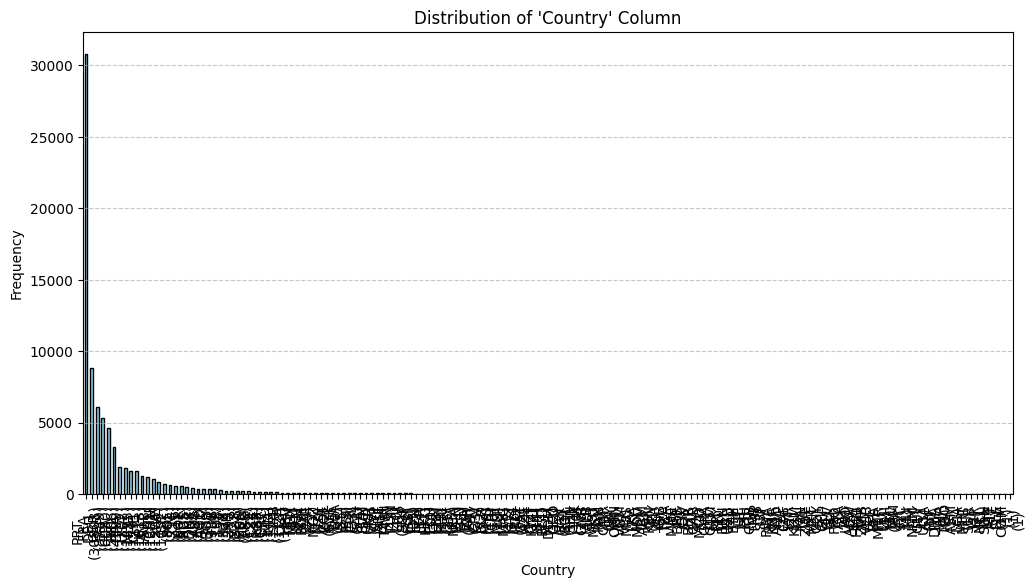

Country
PRT    30803
FRA     8789
DEU     6080
GBR     5306
ESP     4599
ITA     3302
BEL     1893
BRA     1791
USA     1613
NLD     1588
Name: count, dtype: int64

In [1318]:
plot_distribution(h2_df, 'Country', title=f"Distribution of 'Country' Column")
h2_df['Country'].value_counts().head(10)

In [1319]:
# Load ISO country codes
countries_df = pd.read_csv("../data/ISO_country_code.csv", index_col='alpha-3')

# Changes values in for most common origin countries
countries_df.loc['PRT'] = 'National'
countries_df.loc['FRA'] = 'France'
countries_df.loc['DEU'] = 'Germany'
countries_df.loc['GBR'] = 'United_Kingdom'
countries_df.loc['ESP'] = 'Spain'

# Converts country codes in a dict
countries_dict = countries_df.to_dict()['region']

# Regroup Country attribute in fewer categories
h2_df['Country'].replace(countries_dict, inplace=True)

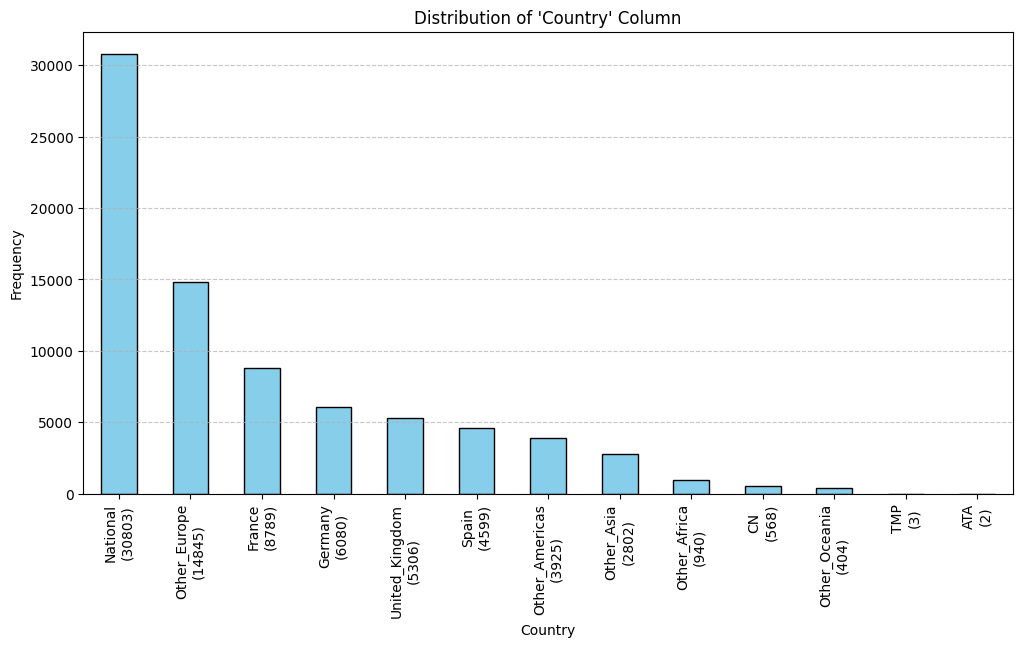

Country
National          30803
Other_Europe      14845
France             8789
Germany            6080
United_Kingdom     5306
Spain              4599
Other_Americas     3925
Other_Asia         2802
Other_Africa        940
CN                  568
Other_Oceania       404
TMP                   3
ATA                   2
Name: count, dtype: int64

In [1320]:
plot_distribution(h2_df, 'Country', title=f"Distribution of 'Country' Column")
h2_df['Country'].value_counts()

In [1321]:
# Delete Countries that have wrong entry: ATA, TMP
h2_df = h2_df[~h2_df['Country'].isin(['ATA', 'TMP'])]

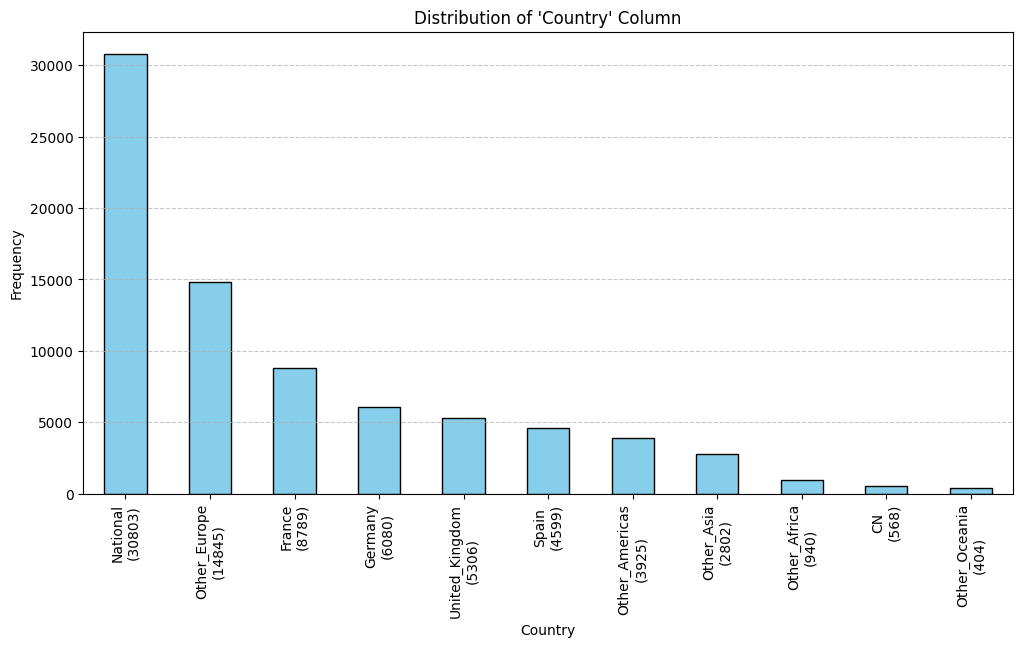

Country
National          30803
Other_Europe      14845
France             8789
Germany            6080
United_Kingdom     5306
Spain              4599
Other_Americas     3925
Other_Asia         2802
Other_Africa        940
CN                  568
Other_Oceania       404
Name: count, dtype: int64

In [1322]:
plot_distribution(h2_df, 'Country', title=f"Distribution of 'Country' Column")
h2_df['Country'].value_counts()

#### `StaysInWeekendNights`

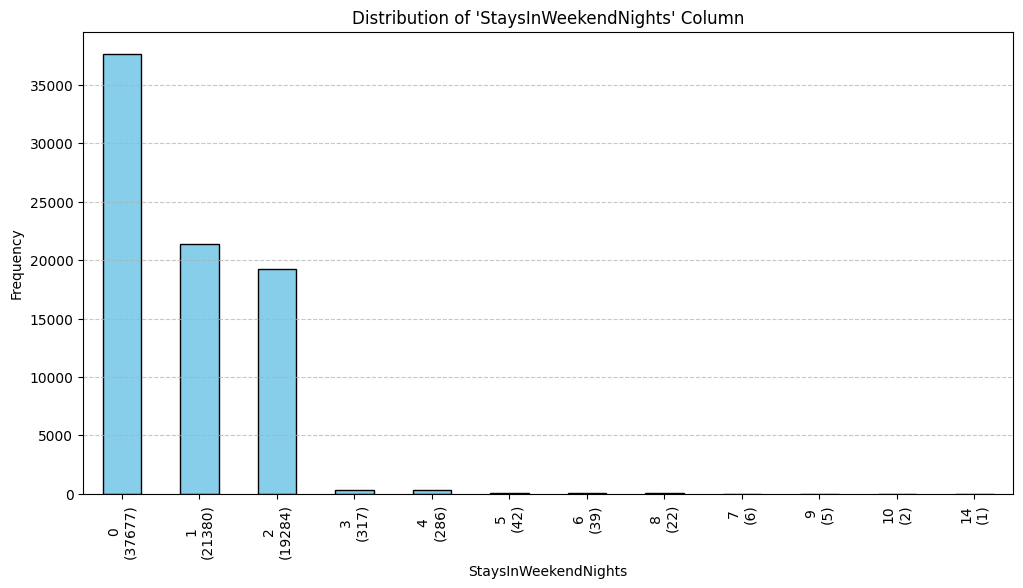

StaysInWeekendNights
0     37677
1     21380
2     19284
3       317
4       286
5        42
6        39
8        22
7         6
9         5
10        2
14        1
Name: count, dtype: int64

In [1323]:
plot_distribution(h2_df, 'StaysInWeekendNights', 
                      title=f"Distribution of 'StaysInWeekendNights' Column")
h2_df['StaysInWeekendNights'].value_counts()

In [1324]:
# Reduce number of categories in StaysInWeekendNights column
h2_df["StaysInWeekendNights"] = pd.cut(
    h2_df["StaysInWeekendNights"],
    bins=[-np.inf, 0, 1, 2, np.inf],
    labels=["0", "1", "2", "3+"],
)

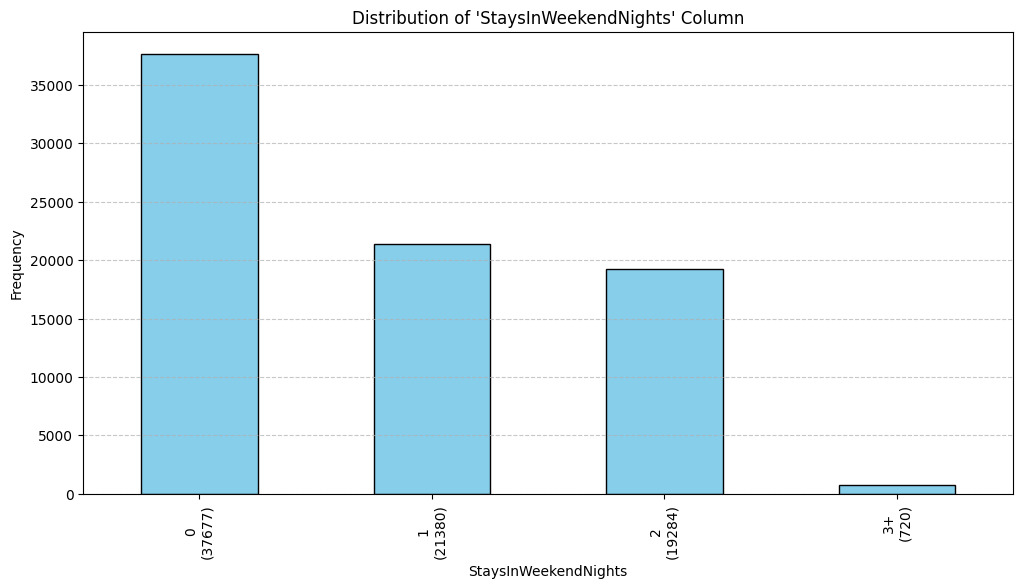

StaysInWeekendNights
0     37677
1     21380
2     19284
3+      720
Name: count, dtype: int64

In [1325]:
plot_distribution(h2_df, 'StaysInWeekendNights', 
                      title=f"Distribution of 'StaysInWeekendNights' Column")
h2_df['StaysInWeekendNights'].value_counts()

#### `Adults` and `Children`

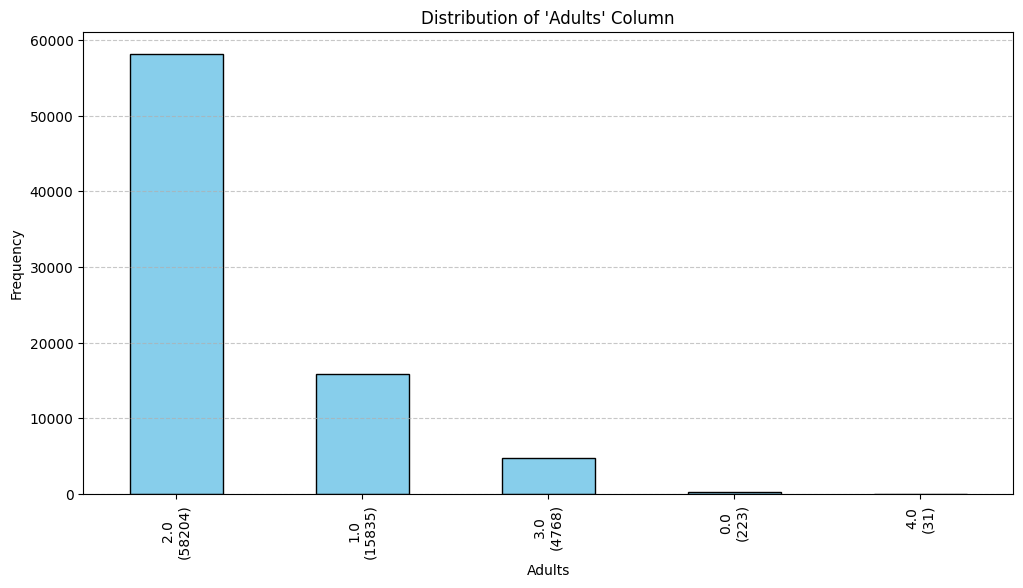

Adults
2.0    58204
1.0    15835
3.0     4768
0.0      223
4.0       31
Name: count, dtype: int64

In [1326]:
plot_distribution(h2_df, "Adults", 
                  title=f"Distribution of 'Adults' Column")
h2_df["Adults"].value_counts()

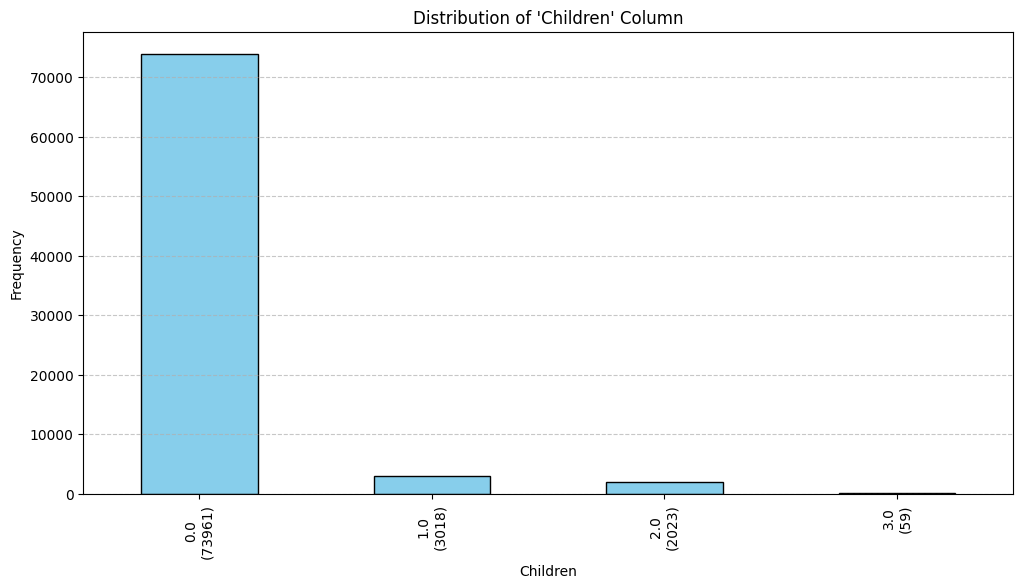

Children
0.0    73961
1.0     3018
2.0     2023
3.0       59
Name: count, dtype: int64

In [1327]:
plot_distribution(h2_df, "Children", 
                  title=f"Distribution of 'Children' Column")
h2_df["Children"].value_counts()

In [1328]:
# Replace rare values in 'Adults' and 'Children' columns with closest values
h2_df['Adults'].replace(4.0, 3.0, inplace=True)
h2_df['Adults'].replace(0.0, 1.0, inplace=True)
h2_df['Children'].replace(3.0, 2.0, inplace=True)

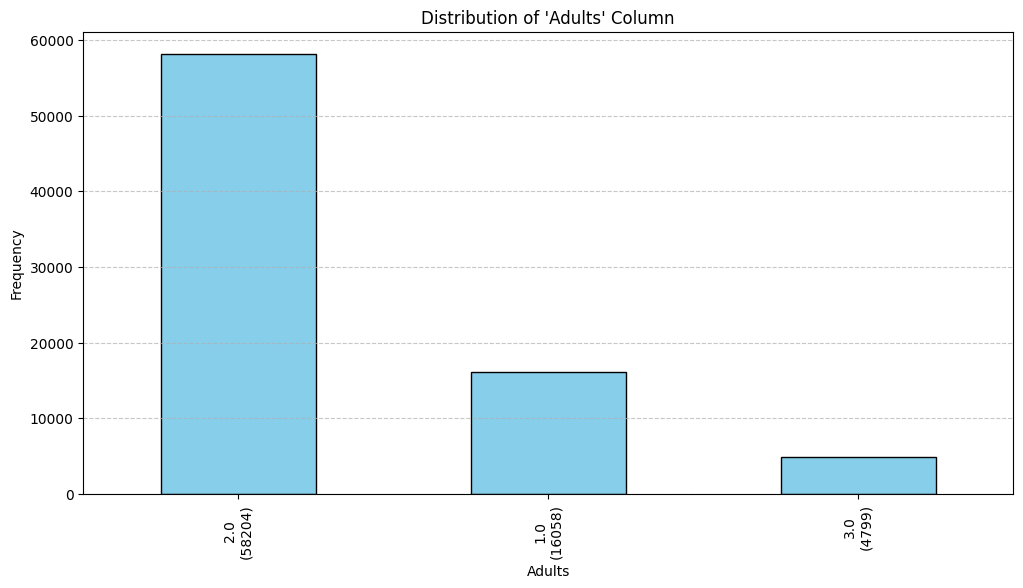

Adults
2.0    58204
1.0    16058
3.0     4799
Name: count, dtype: int64

In [1329]:
plot_distribution(h2_df, "Adults", 
                  title=f"Distribution of 'Adults' Column")
h2_df["Adults"].value_counts()

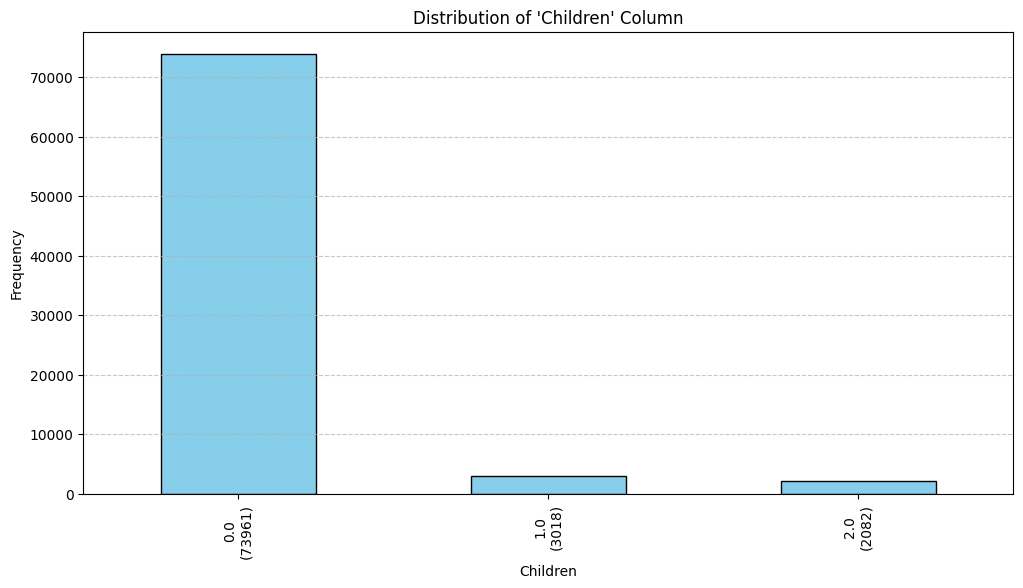

Children
0.0    73961
1.0     3018
2.0     2082
Name: count, dtype: int64

In [1330]:
plot_distribution(h2_df, "Children", 
                  title=f"Distribution of 'Children' Column")
h2_df["Children"].value_counts()

#### `DistributionChannel`

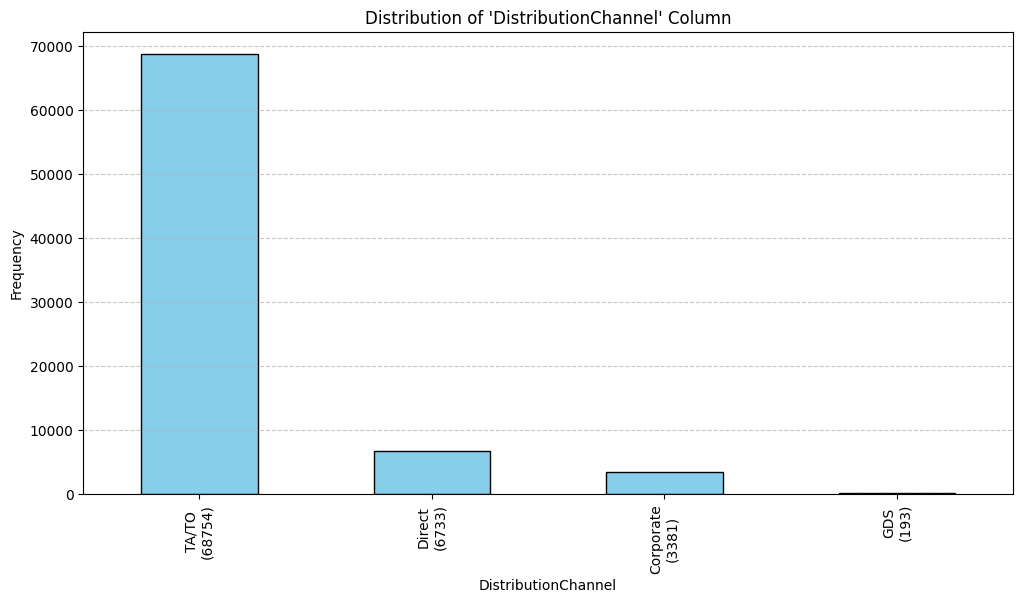

DistributionChannel
TA/TO        68754
Direct        6733
Corporate     3381
GDS            193
Name: count, dtype: int64

In [1331]:
plot_distribution(h2_df, "DistributionChannel", 
                  title=f"Distribution of 'DistributionChannel' Column")
h2_df["DistributionChannel"].value_counts()

In [1332]:
h2_df["DistributionChannel"] = h2_df["DistributionChannel"].replace("GDS", "Corporate")

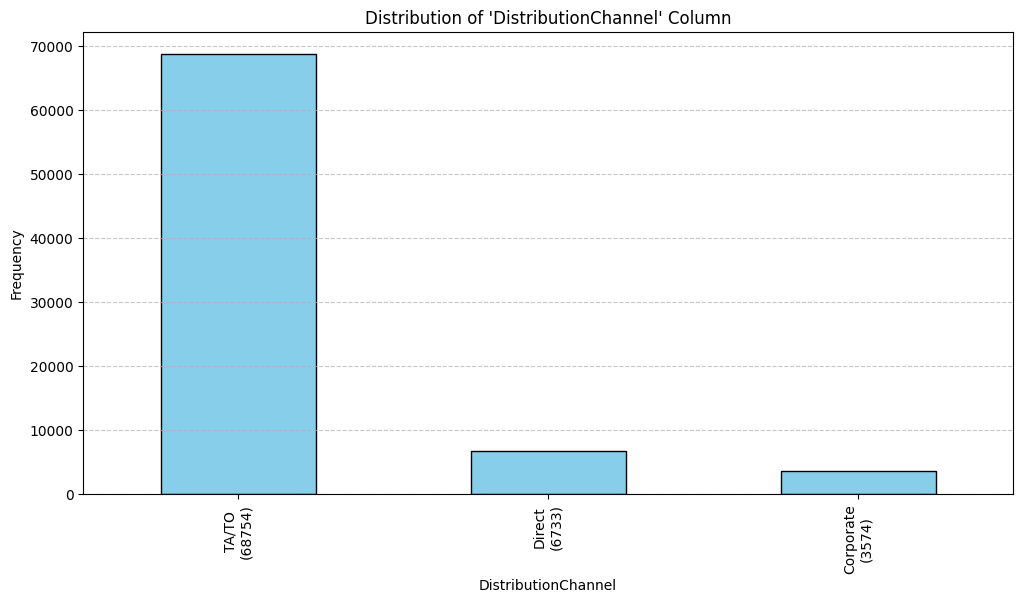

DistributionChannel
TA/TO        68754
Direct        6733
Corporate     3574
Name: count, dtype: int64

In [1333]:
plot_distribution(h2_df, "DistributionChannel", 
                  title=f"Distribution of 'DistributionChannel' Column")
h2_df["DistributionChannel"].value_counts()

#### `PreviousCancellations`

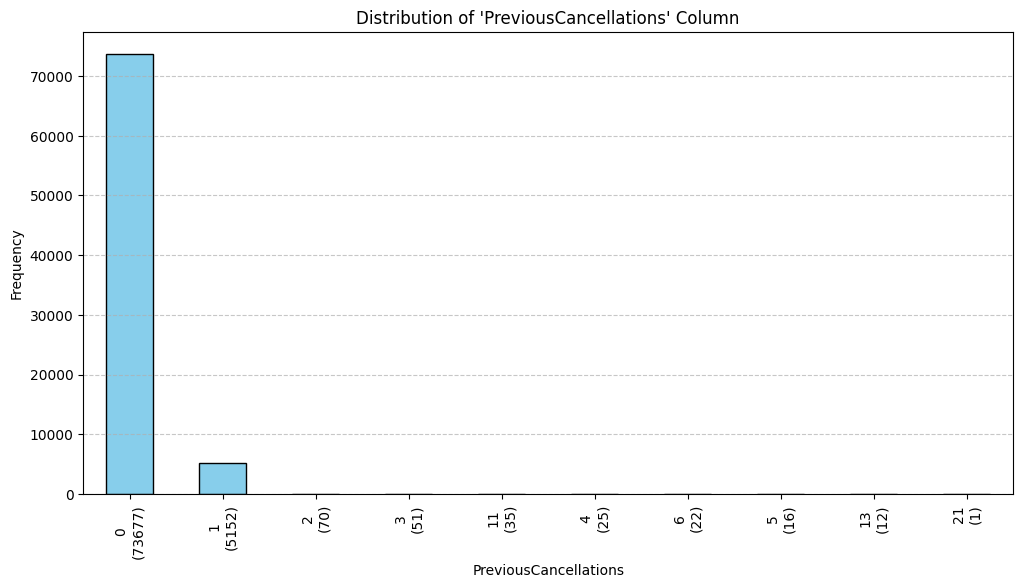

PreviousCancellations
0     73677
1      5152
2        70
3        51
11       35
4        25
6        22
5        16
13       12
21        1
Name: count, dtype: int64

In [1334]:
plot_distribution(h2_df, "PreviousCancellations", 
                  title=f"Distribution of 'PreviousCancellations' Column")
h2_df["PreviousCancellations"].value_counts()

In [1335]:
h2_df["PreviousCancellations"] = h2_df["PreviousCancellations"].replace(
    [2, 3, 11, 4, 6, 5, 13, 21], 1
)

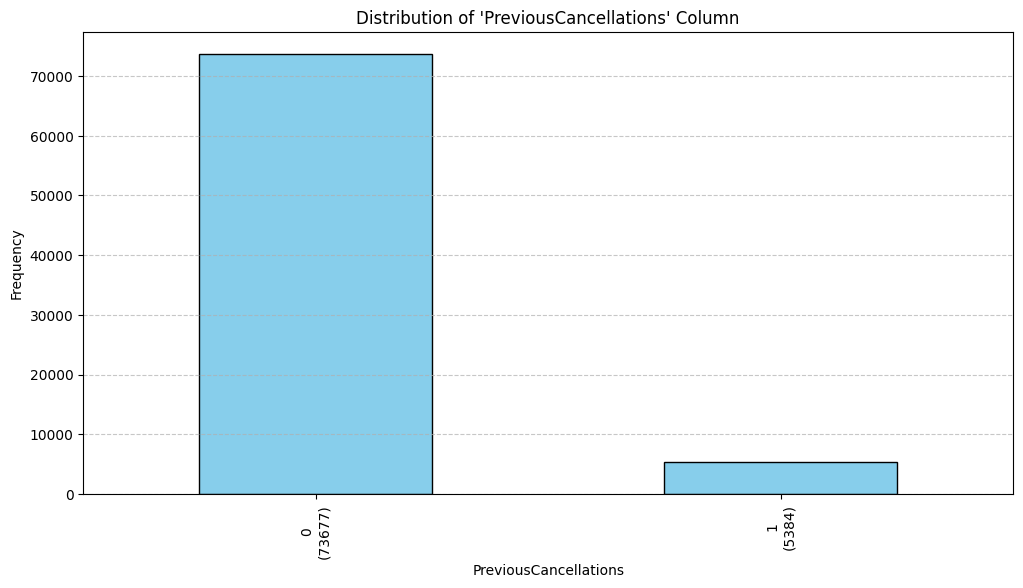

PreviousCancellations
0    73677
1     5384
Name: count, dtype: int64

In [1336]:
plot_distribution(h2_df, "PreviousCancellations", 
                  title=f"Distribution of 'PreviousCancellations' Column")
h2_df["PreviousCancellations"].value_counts()

#### `ReservedRoomType`and `AssignedRoomType`

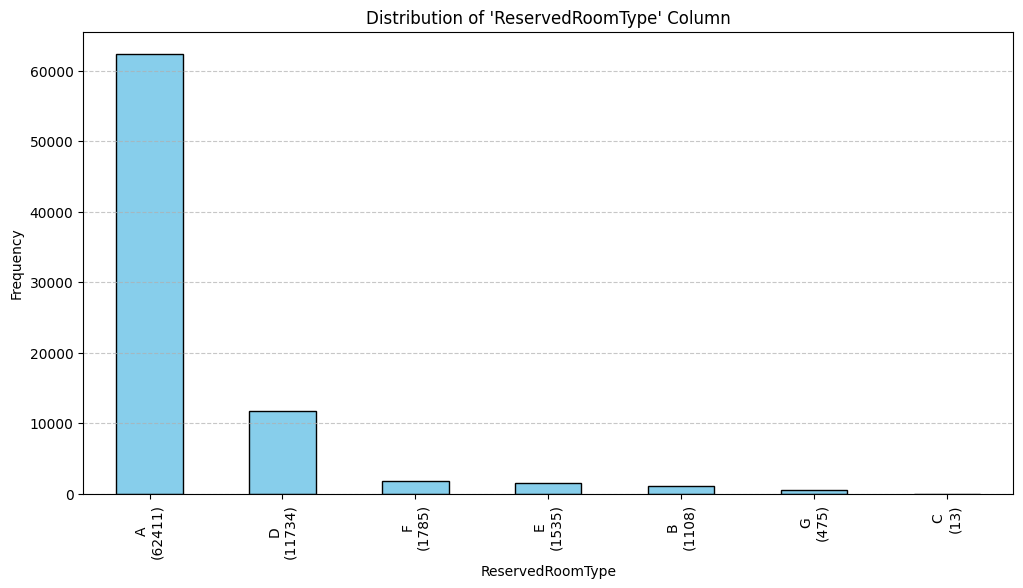

ReservedRoomType
A    62411
D    11734
F     1785
E     1535
B     1108
G      475
C       13
Name: count, dtype: int64

In [1337]:
plot_distribution(h2_df, "ReservedRoomType", 
                  title=f"Distribution of 'ReservedRoomType' Column")
h2_df["ReservedRoomType"].value_counts()

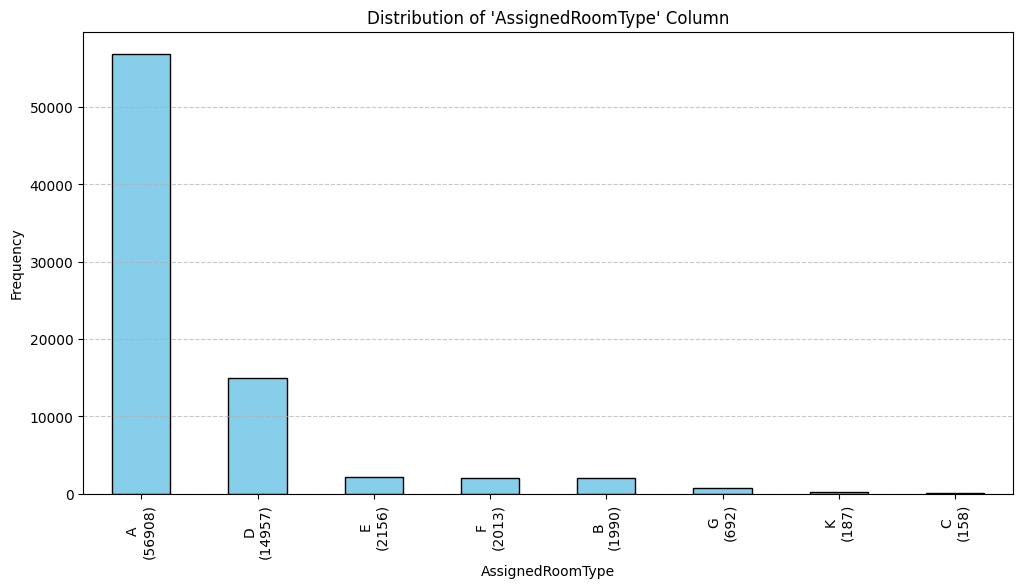

AssignedRoomType
A    56908
D    14957
E     2156
F     2013
B     1990
G      692
K      187
C      158
Name: count, dtype: int64

In [1338]:
plot_distribution(h2_df, "AssignedRoomType", 
                  title=f"Distribution of 'AssignedRoomType' Column")
h2_df["AssignedRoomType"].value_counts()

In [1339]:
# Group rare values in 'ReservedRoomType' and 'AssignedRoomType' columns
reserved_counts = h2_df["ReservedRoomType"].value_counts()
assigned_counts = h2_df["AssignedRoomType"].value_counts()

h2_df["ReservedRoomType"] = h2_df["ReservedRoomType"].apply(
    lambda x: "Other" if reserved_counts[x] < 500 else x
)
h2_df["AssignedRoomType"] = h2_df["AssignedRoomType"].apply(
    lambda x: "Other" if assigned_counts[x] < 500 else x
)

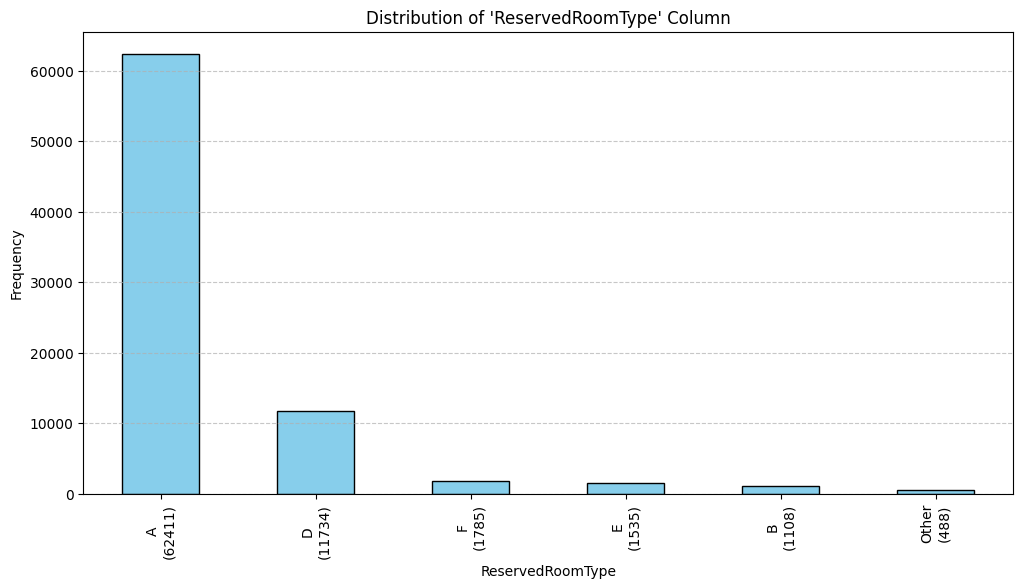

ReservedRoomType
A        62411
D        11734
F         1785
E         1535
B         1108
Other      488
Name: count, dtype: int64

In [1340]:
plot_distribution(h2_df, "ReservedRoomType", 
                  title=f"Distribution of 'ReservedRoomType' Column")
h2_df["ReservedRoomType"].value_counts()

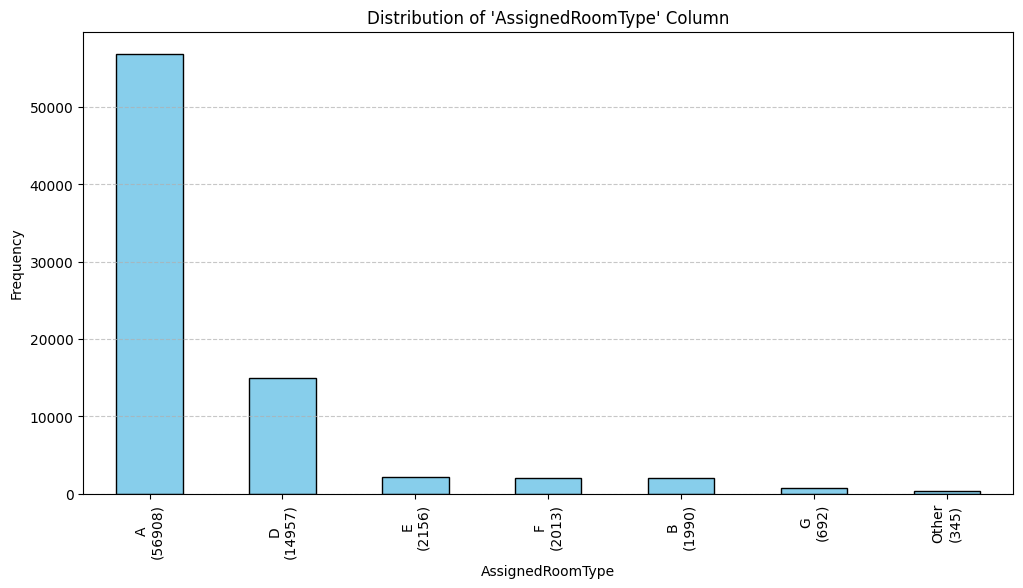

AssignedRoomType
A        56908
D        14957
E         2156
F         2013
B         1990
G          692
Other      345
Name: count, dtype: int64

In [1341]:
plot_distribution(h2_df, "AssignedRoomType", 
                  title=f"Distribution of 'AssignedRoomType' Column")
h2_df["AssignedRoomType"].value_counts()

#### `TotalOfSpecialRequests`

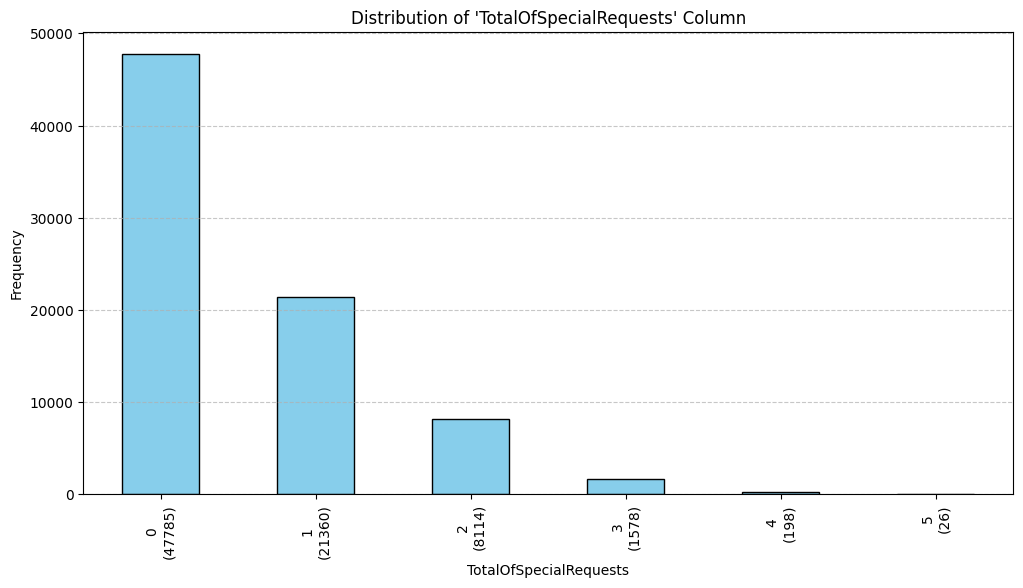

TotalOfSpecialRequests
0    47785
1    21360
2     8114
3     1578
4      198
5       26
Name: count, dtype: int64

In [1342]:
plot_distribution(h2_df, "TotalOfSpecialRequests", 
                  title=f"Distribution of 'TotalOfSpecialRequests' Column")
h2_df["TotalOfSpecialRequests"].value_counts()

In [1343]:
h2_df["TotalOfSpecialRequests"] = pd.cut(
    h2_df["TotalOfSpecialRequests"],
    bins=[-np.inf, 0, 1, np.inf],
    labels=["0", "1", "2+"],
)

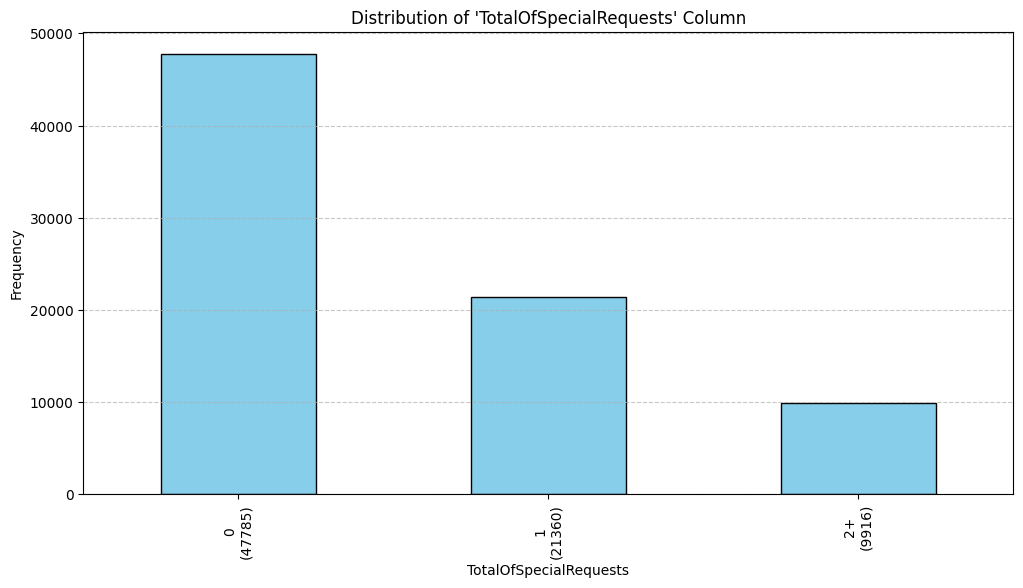

TotalOfSpecialRequests
0     47785
1     21360
2+     9916
Name: count, dtype: int64

In [1344]:
plot_distribution(h2_df, "TotalOfSpecialRequests", 
                  title=f"Distribution of 'TotalOfSpecialRequests' Column")
h2_df["TotalOfSpecialRequests"].value_counts()

#### `Agent`

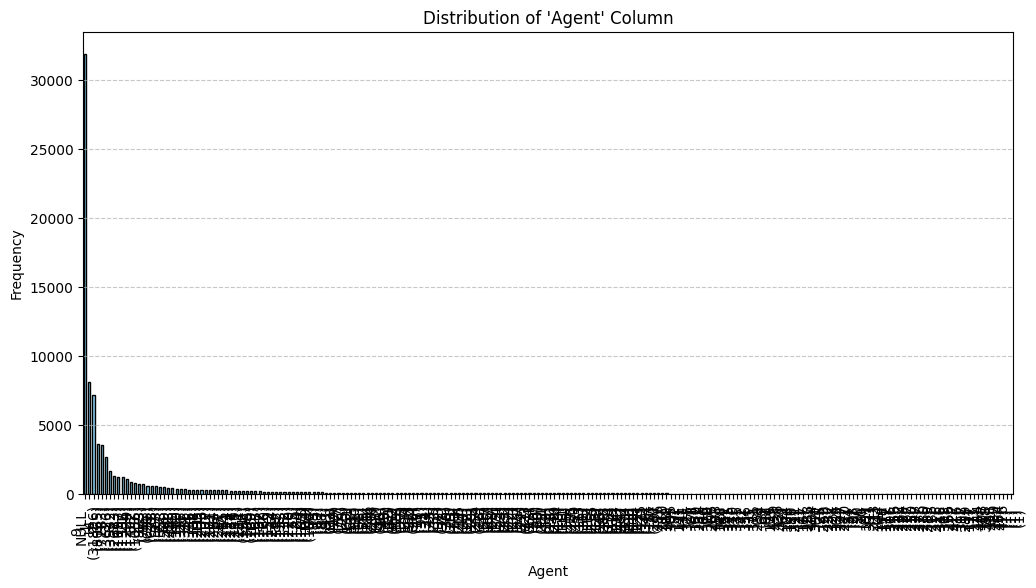

Agent
9       31896
NULL     8065
1        7133
14       3626
7        3532
6        2683
28       1657
3        1308
8        1234
37       1192
Name: count, dtype: int64

In [1345]:
plot_distribution(h2_df, 'Agent', 
                  title=f"Distribution of 'Agent' Column")
h2_df['Agent'].value_counts().head(10)

In [1346]:
# Replace NULL values in Agent column with 0
h2_df["Agent"].replace("NULL", 0, inplace=True)

# Convert Agent column to int
h2_df["Agent"] = h2_df["Agent"].astype(int)

# Replace most common agents with code for better readability
conv = {
    0: "no_Agent",
    9: "Agent_A",
    1: "Agent_B",
    14: "Agent_C",
    7: "Agent_D",
    6: "Agent_E",
}
h2_df["Agent"].replace(conv, inplace=True)

# Replace agents not in the conv dictionary with 'Other'
h2_df["Agent"] = h2_df["Agent"].apply(
    lambda x: x if x in conv.values() else "Other_Agent"
)

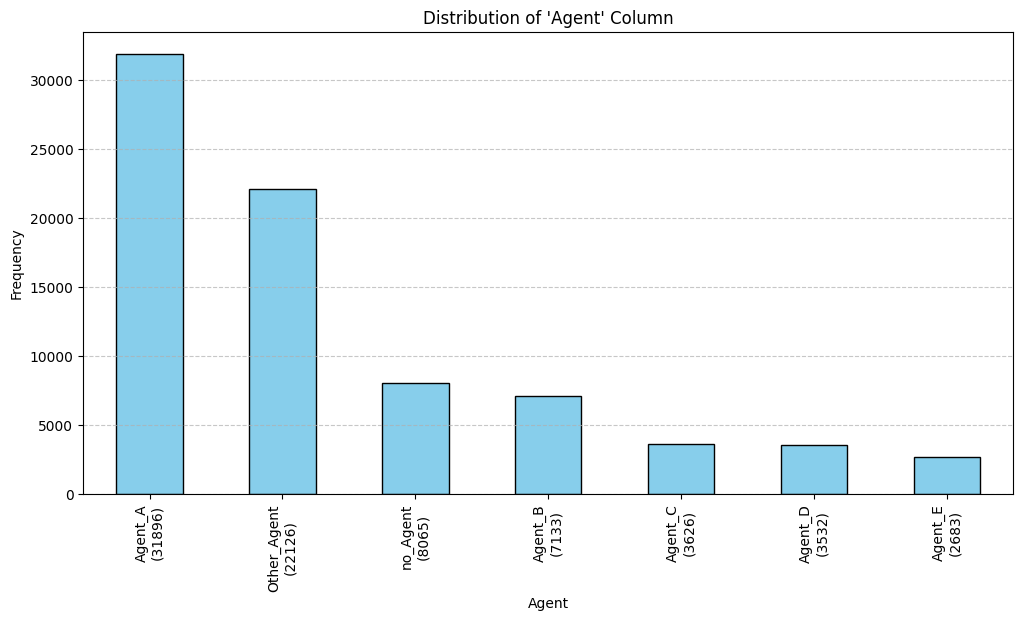

Agent
Agent_A        31896
Other_Agent    22126
no_Agent        8065
Agent_B         7133
Agent_C         3626
Agent_D         3532
Agent_E         2683
Name: count, dtype: int64

In [1347]:
plot_distribution(h2_df, 'Agent', 
                  title=f"Distribution of 'Agent' Column")
h2_df['Agent'].value_counts()

#### `Company`

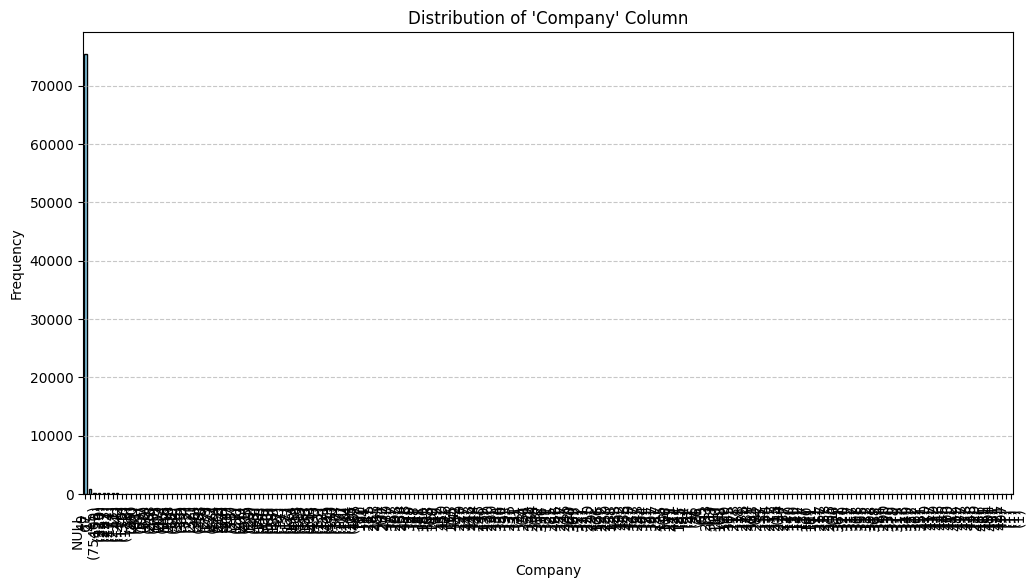

Company
NULL    75400
40        920
67        267
45        247
153       213
        ...  
481         1
494         1
491         1
421         1
497         1
Name: count, Length: 204, dtype: int64

In [1348]:
plot_distribution(h2_df, 'Company', 
                  title=f"Distribution of 'Company' Column")
h2_df['Company'].value_counts()

In [1349]:
# Replace NULL values in Agent column with 0
h2_df["Company"].replace("NULL", 0, inplace=True)

# Convert Company column to int
h2_df["Company"] = h2_df["Company"].astype(int)

# Replace most common agents with code for better readability
conv = {0: "no_Company", 40: "Company_A"}
h2_df["Company"].replace(conv, inplace=True)

# Replace agents not in the conv dictionary with 'Other'
h2_df["Company"] = h2_df["Company"].apply(
    lambda x: x if x in conv.values() else "Other_Company"
)

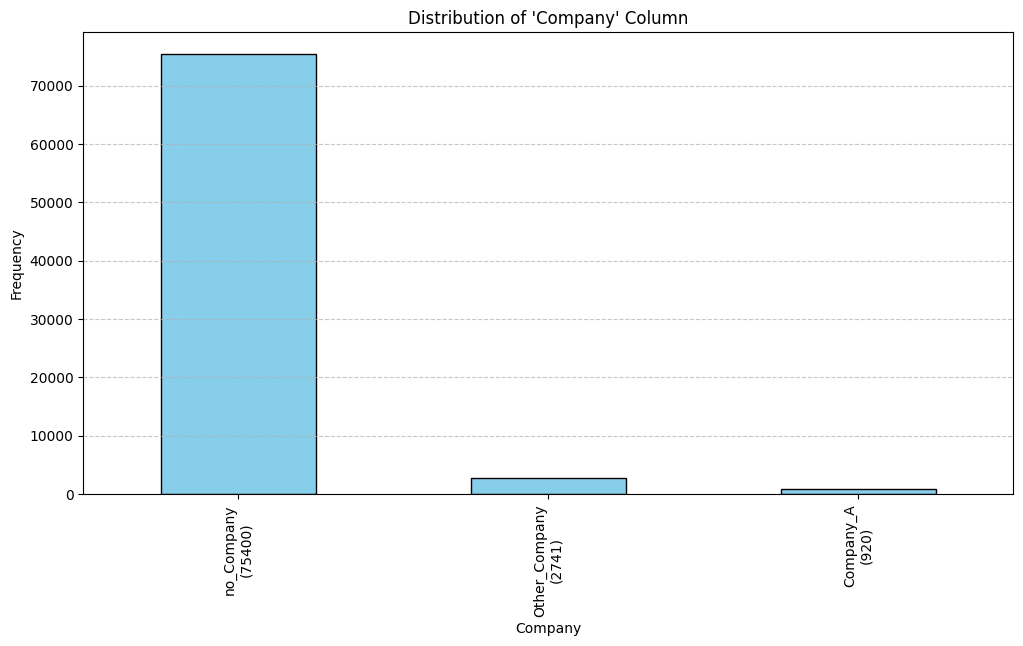

Company
no_Company       75400
Other_Company     2741
Company_A          920
Name: count, dtype: int64

In [1350]:
plot_distribution(h2_df, 'Company', 
                  title=f"Distribution of 'Company' Column")
h2_df['Company'].value_counts()

#### `StaysInWeekNights`

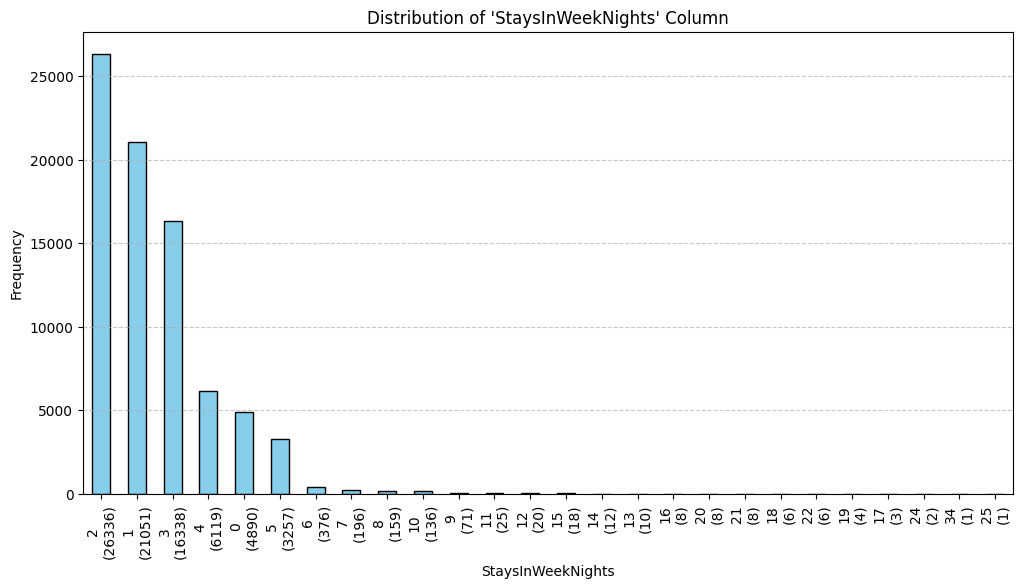

StaysInWeekNights
2     26336
1     21051
3     16338
4      6119
0      4890
5      3257
6       376
7       196
8       159
10      136
9        71
11       25
12       20
15       18
14       12
13       10
16        8
20        8
21        8
18        6
22        6
19        4
17        3
24        2
34        1
25        1
Name: count, dtype: int64

In [1351]:
plot_distribution(h2_df, 'StaysInWeekNights', 
                  title=f"Distribution of 'StaysInWeekNights' Column")
h2_df['StaysInWeekNights'].value_counts()

In [1352]:
# Reduce number of categories in StaysInWeekendNights column
h2_df["StaysInWeekNights"] = pd.cut(
    h2_df["StaysInWeekNights"],
    bins=[-np.inf, 0, 1, 2, 3, 4, 5, np.inf],
    labels=["0", "1", "2", "3", "4", "5", "6+"],
)

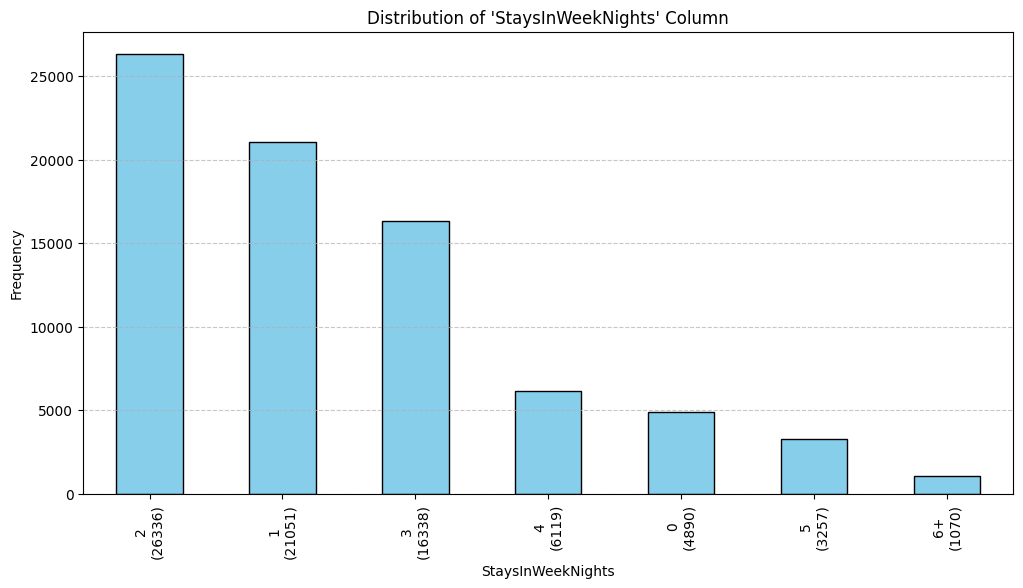

StaysInWeekNights
2     26336
1     21051
3     16338
4      6119
0      4890
5      3257
6+     1070
Name: count, dtype: int64

In [1353]:
plot_distribution(h2_df, 'StaysInWeekNights', 
                  title=f"Distribution of 'StaysInWeekNights' Column")
h2_df['StaysInWeekNights'].value_counts()

#### `PreviousBookingsNotCanceled`

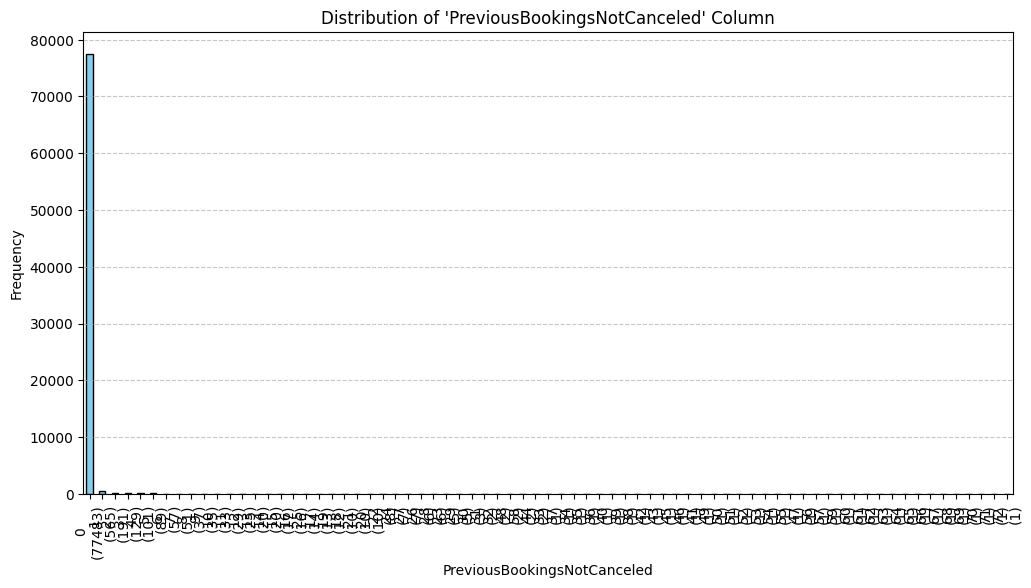

PreviousBookingsNotCanceled
0     77483
1       565
2       191
3       129
4       101
      ...  
68        1
69        1
70        1
71        1
72        1
Name: count, Length: 73, dtype: int64

In [1354]:
plot_distribution(h2_df, 'PreviousBookingsNotCanceled', 
                  title=f"Distribution of 'PreviousBookingsNotCanceled' Column")
h2_df['PreviousBookingsNotCanceled'].value_counts()

In [1355]:
# Regroups PreviousBookingsNotCanceled column in fewer categories
h2_df["PreviousBookingsNotCanceled"] = pd.cut(
    h2_df["PreviousBookingsNotCanceled"],
    bins=[-np.inf, 0, np.inf],
    labels=["0", "1+"],
)

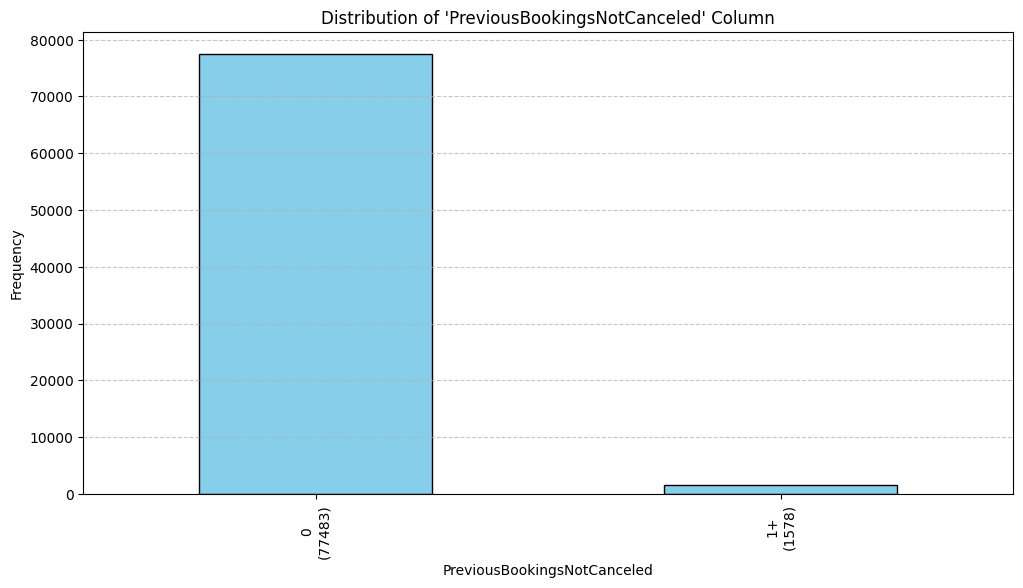

PreviousBookingsNotCanceled
0     77483
1+     1578
Name: count, dtype: int64

In [1356]:
plot_distribution(h2_df, 'PreviousBookingsNotCanceled', 
                  title=f"Distribution of 'PreviousBookingsNotCanceled' Column")
h2_df['PreviousBookingsNotCanceled'].value_counts()

#### `BookingChanges`

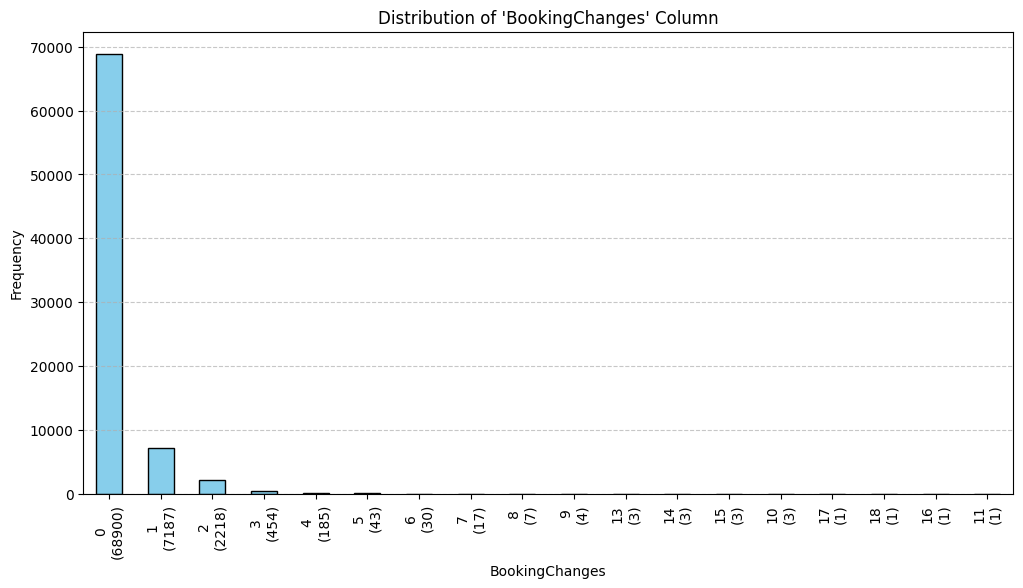

BookingChanges
0     68900
1      7187
2      2218
3       454
4       185
5        43
6        30
7        17
8         7
9         4
13        3
14        3
15        3
10        3
17        1
18        1
16        1
11        1
Name: count, dtype: int64

In [1357]:
plot_distribution(h2_df, 'BookingChanges', 
                  title=f"Distribution of 'BookingChanges' Column")
h2_df['BookingChanges'].value_counts()

In [1358]:
# Regroups BookingChanges column in fewer categories
h2_df["BookingChanges"] = pd.cut(
    h2_df["BookingChanges"],
    bins=[-np.inf, 0, np.inf],
    labels=["0", "1+"],
)

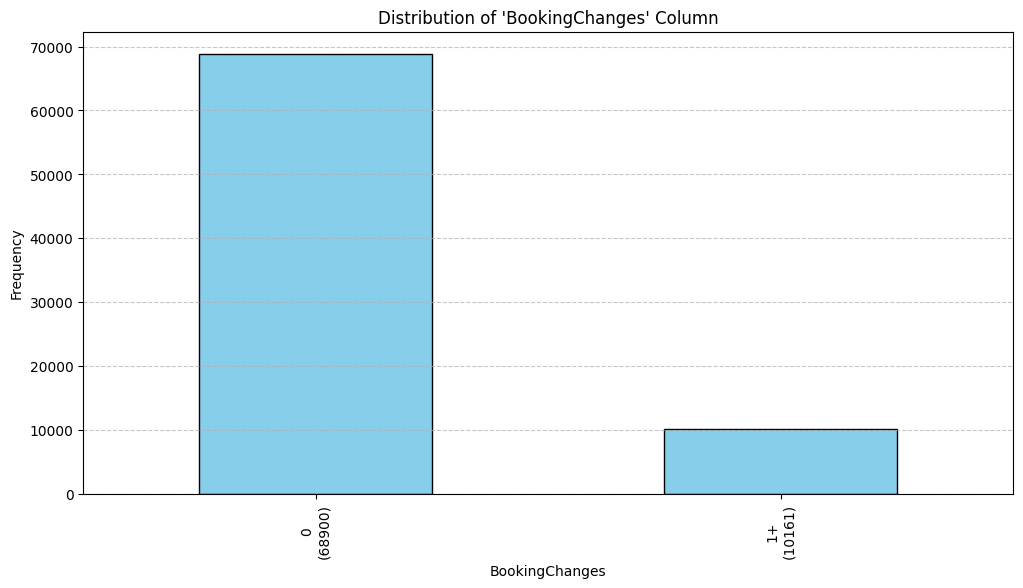

BookingChanges
0     68900
1+    10161
Name: count, dtype: int64

In [1359]:
plot_distribution(h2_df, 'BookingChanges', 
                  title=f"Distribution of 'BookingChanges' Column")
h2_df['BookingChanges'].value_counts()

#### `DaysInWaitingList`

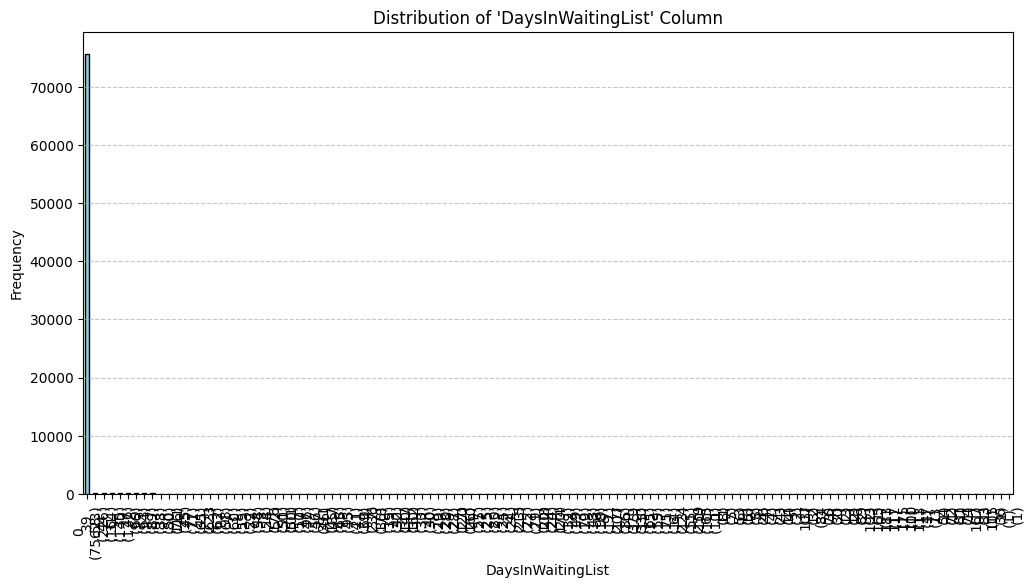

DaysInWaitingList
0      75623
39       226
58       164
44       140
31       127
       ...  
74         1
167        1
83         1
105        1
36         1
Name: count, Length: 114, dtype: int64

In [1360]:
plot_distribution(h2_df, 'DaysInWaitingList', 
                  title=f"Distribution of 'DaysInWaitingList' Column")
h2_df['DaysInWaitingList'].value_counts()

In [1361]:
percentiles = h2_df["DaysInWaitingList"].quantile([0.25, 0.5, 0.75, 1]).values


def percentile_based_grouping(days):
    if days <= percentiles[0]:
        return "Low Wait"
    elif days <= percentiles[1]:
        return "Moderate Wait"
    elif days <= percentiles[2]:
        return "High Wait"
    else:
        return "Very High Wait"


# Group DaysInWaitingList column based on percentiles
h2_df["WaitingListCategory"] = h2_df["DaysInWaitingList"].apply(
    percentile_based_grouping
)

# Drop DaysInWaitingList column
h2_df.drop(columns=["DaysInWaitingList"], inplace=True)

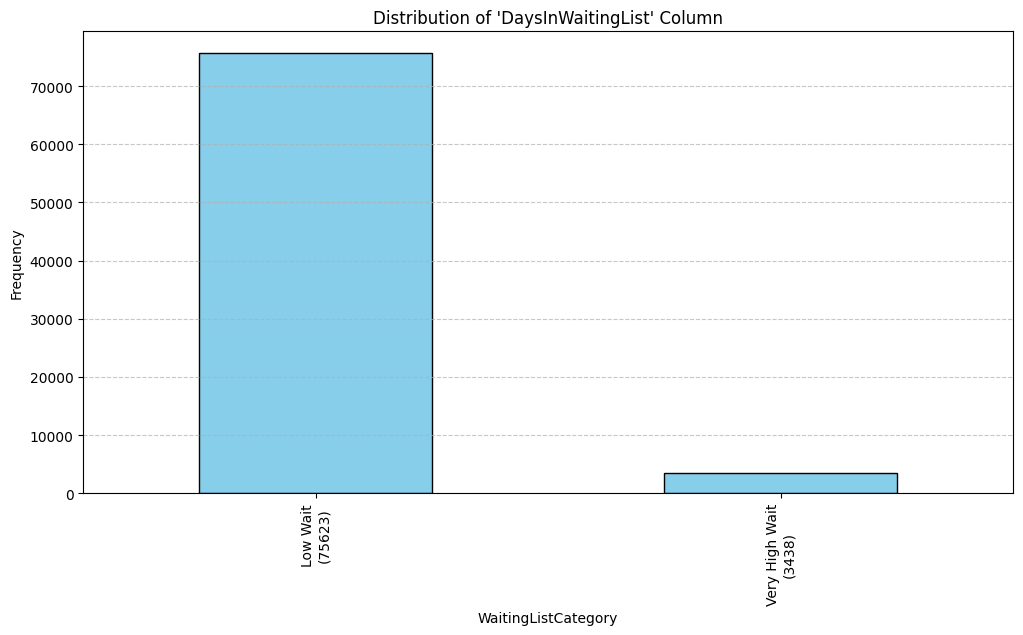

WaitingListCategory
Low Wait          75623
Very High Wait     3438
Name: count, dtype: int64

In [1362]:
plot_distribution(h2_df, 'WaitingListCategory', 
                  title=f"Distribution of 'DaysInWaitingList' Column")
h2_df['WaitingListCategory'].value_counts()

## 3.3. Outlier Analysis and Elimination

In [1363]:
def plot_boxplot(df, columns, colors, title, xlabel, ylabel, fig_size=(15, 8)):
    plt.figure(figsize=fig_size)
    box = df[columns].boxplot(
        grid=False, vert=False, fontsize=12, patch_artist=True, return_type="dict"
    )
    for patch, color in zip(box["boxes"], colors):
        patch.set_facecolor(color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()

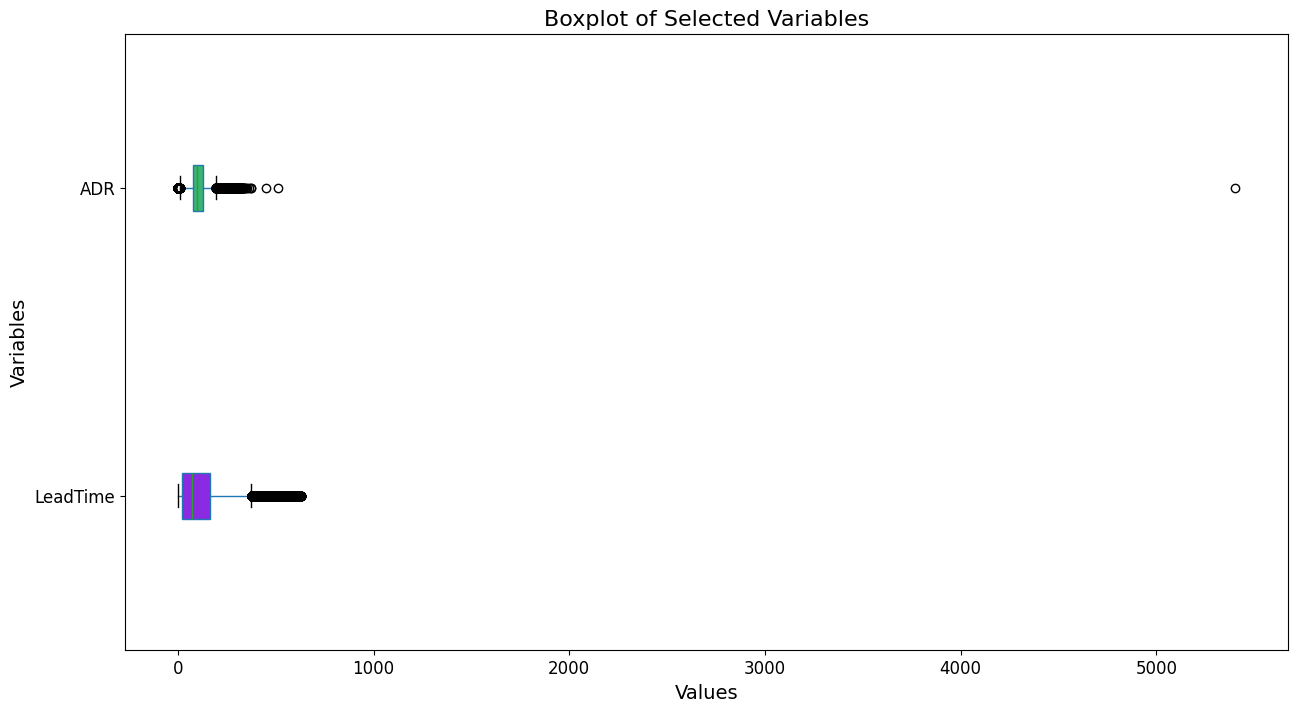

In [1364]:
plot_boxplot(
    h2_df,
    columns=["LeadTime", "ADR"],
    colors=["#8A2BE2", "#3CB371"],
    title="Boxplot of Selected Variables",
    xlabel="Values",
    ylabel="Variables",
)

In [1365]:
# Eliminate values in ADR higher than EUR 1,000
h2_df = h2_df[h2_df['ADR'] < 1000]

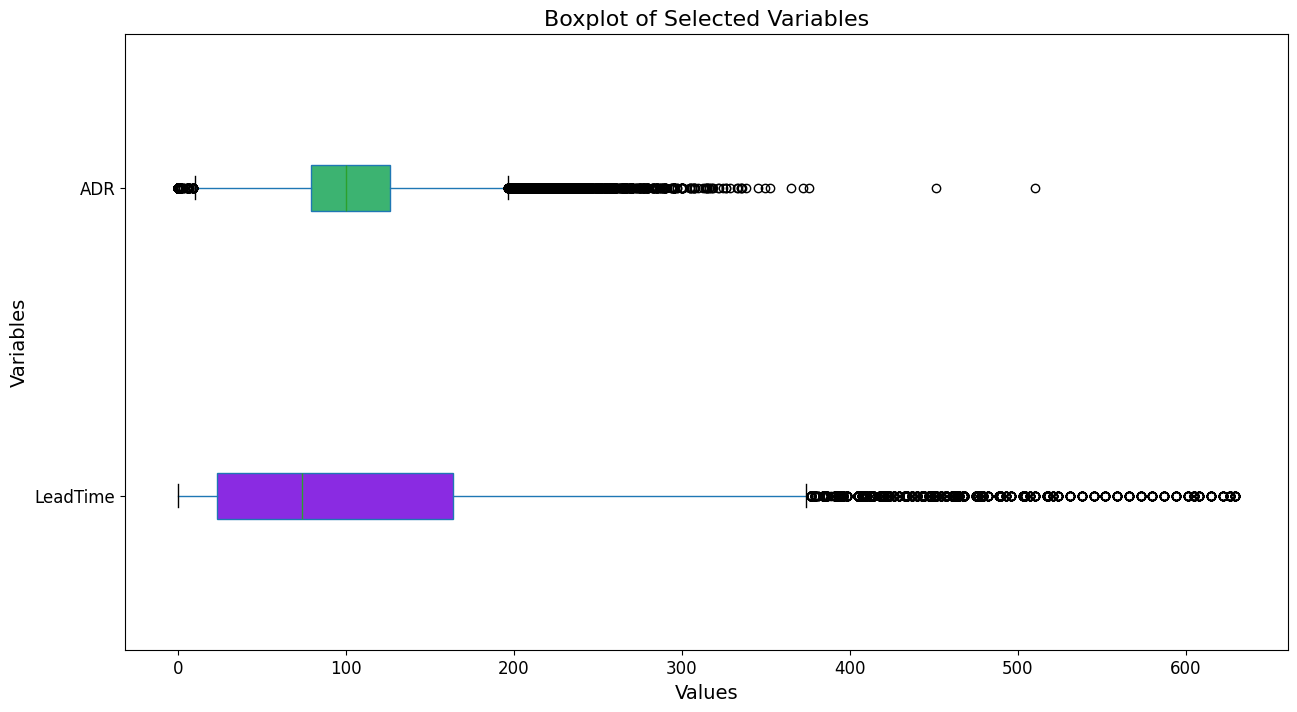

In [1366]:
plot_boxplot(
    h2_df,
    columns=["LeadTime", "ADR"],
    colors=["#8A2BE2", "#3CB371"],
    title="Boxplot of Selected Variables",
    xlabel="Values",
    ylabel="Variables",
)

In [1368]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

h2_df["Outlier"] = iso_forest.fit_predict(h2_df[["ADR", "LeadTime"]])

# Exclude outliers
h2_df = h2_df[h2_df["Outlier"] == 1].drop("Outlier", axis=1)

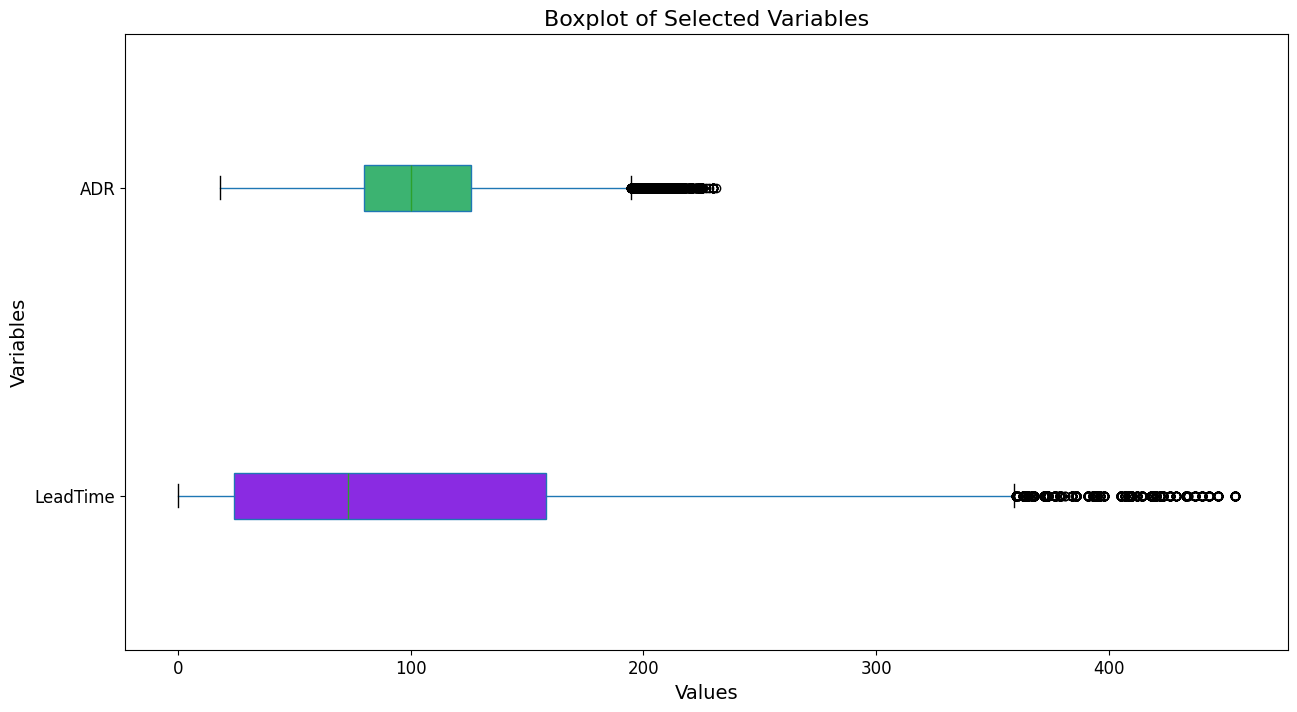

In [1372]:
plot_boxplot(
    h2_df,
    columns=["LeadTime", "ADR"],
    colors=["#8A2BE2", "#3CB371"],
    title="Boxplot of Selected Variables",
    xlabel="Values",
    ylabel="Variables",
)

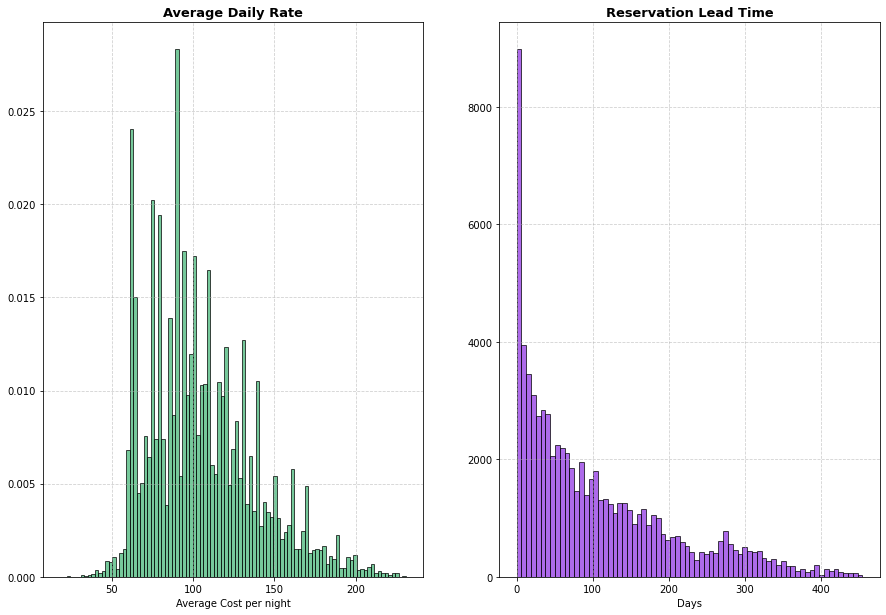

In [1373]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), dpi=72)

# ADR
ax0.hist(h2_df["ADR"], bins="auto", density=True, color="#3CB371", edgecolor="black",
    alpha=0.7,
)
ax0.set_title("Average Daily Rate", fontsize=13, fontweight="bold")
ax0.set_xlabel("Average Cost per night")
ax0.grid(True, linestyle="--", alpha=0.6)

# Lead Time
ax1.hist(h2_df["LeadTime"], bins="auto", color="#8A2BE2", edgecolor="black", alpha=0.7)
ax1.set_title("Reservation Lead Time", fontsize=13, fontweight="bold")
ax1.set_xlabel("Days")
ax1.grid(True, linestyle="--", alpha=0.6)

In [1375]:
h2_df[['ADR', 'LeadTime']].describe().T

,count,mean,std,min,25%,50%,75%,max
ADR,75112.0,105.335973,33.191577,18.0,80.0,100.0,125.8,231.0
LeadTime,75112.0,104.373149,99.592186,0.0,24.0,73.0,158.0,454.0


We'll do skewness analysis on preprocess data part for `ADR` and `LeadTime` columns

## 3.4. Duplication Check

In [1376]:
print(f"Total Number of Duplicate Rows: {len(h2_df) - len(h2_df.drop_duplicates())}")

Total Number of Duplicate Rows: 24752


In [1377]:
# Remove Duplicate Rows
h2_df = h2_df.drop_duplicates()